**Visualization with matplotlib**

In [6]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook
%config IPcompleter.greedy=True


* Importing matplotlib.
 
 Convention dictates that we import as plt


In [7]:
import matplotlib.pyplot as plt

In [8]:
data = np.arange(10)

In [9]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

To make a simple plot, we can use something as simple as
plt.plot(data)

<IPython.core.display.Javascript object>


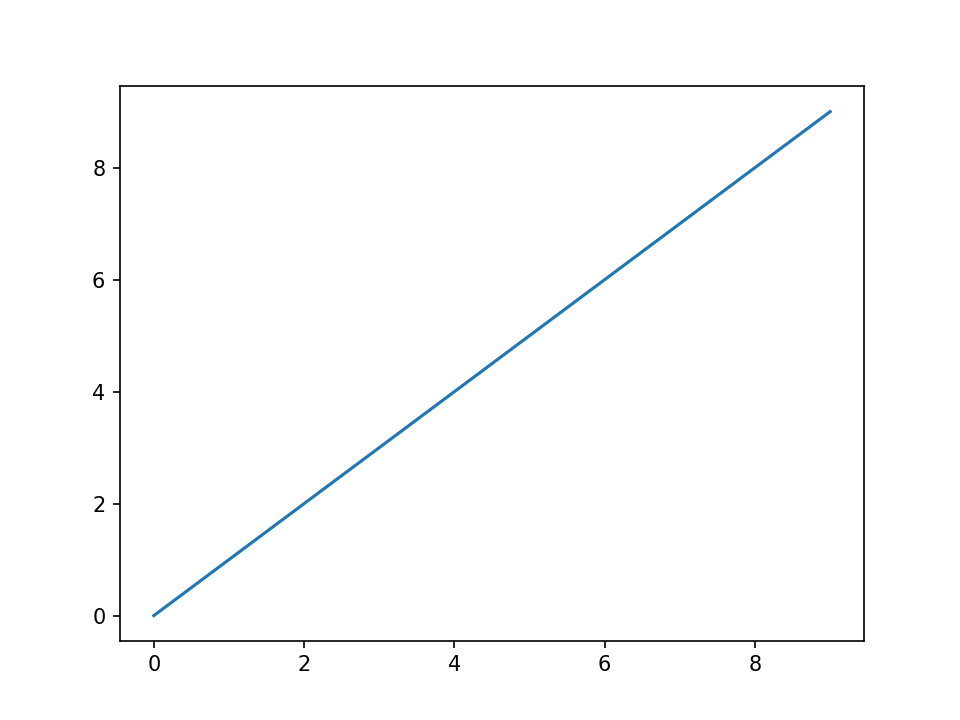

In [10]:
plt.plot(data)

The above creates a simple line plot. Learning matplotlib is critical for a few reasons:
1. Many of the over the top API packages use matplotlib backend and thus necessitate that one understands matplotlib to better customize these.

To create figures and subplots, one can use `plt.figure()` to create a `Figure()` object. 

<IPython.core.display.Javascript object>


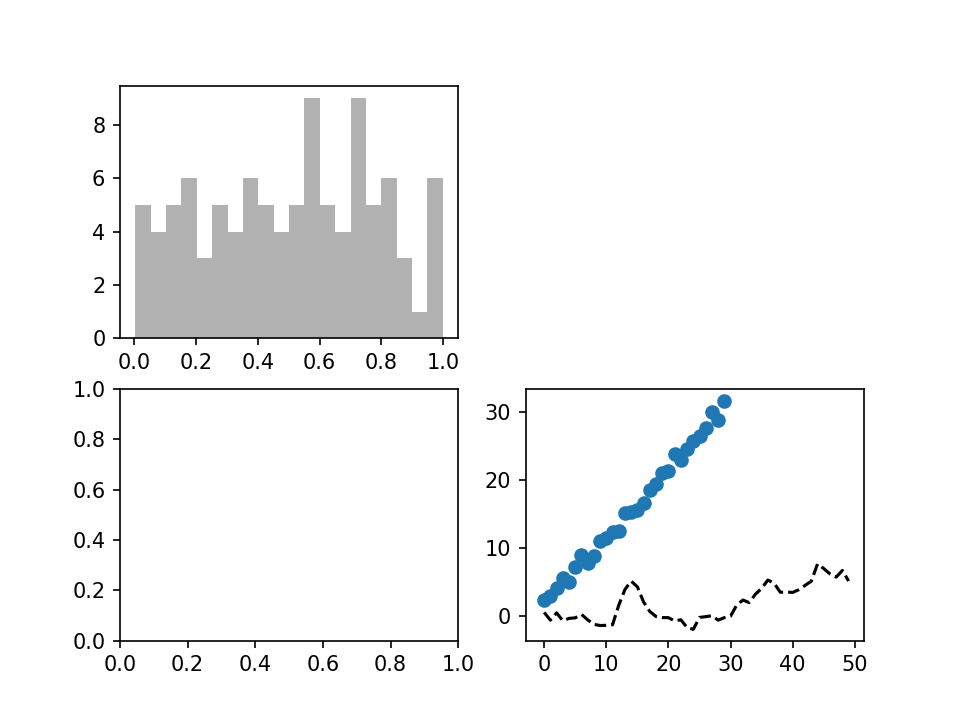

In [11]:
fig = plt.figure()

To create a subplot, we can use `fig.add_subplot` as shown below and specify the nature.

In [12]:
ax1 =fig.add_subplot(2, 2, 1)
# Above is a 2,2 subplot, numbered number 1.
ax2 = fig.add_subplot(2, 2, 3)
ax3 =fig.add_subplot(2, 2, 4)

Next, we can add plots with `plt.plot`, the default is to plot on the last figure and subplot. 


In [13]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In the above code, the `'k--'` is a *style* option to tell `matplotlib` that we need to plot a black dashed line. We can add plots to the objects created by `add_subplot()` by issue methods to them.

In [14]:
_ = ax1.hist(np.random.rand(100), bins= 20, color='k', alpha=0.3)

To add a scatter plot to `ax3`, we can use `ax3.scatter` and its argumenents.

In [15]:
ax3.scatter(np.arange(30), np.arange(30) + 3* np.random.rand(30))

To create a figure with a grid of subplots, we can use `matplotlib`'s convenient `subplots` method.

<IPython.core.display.Javascript object>


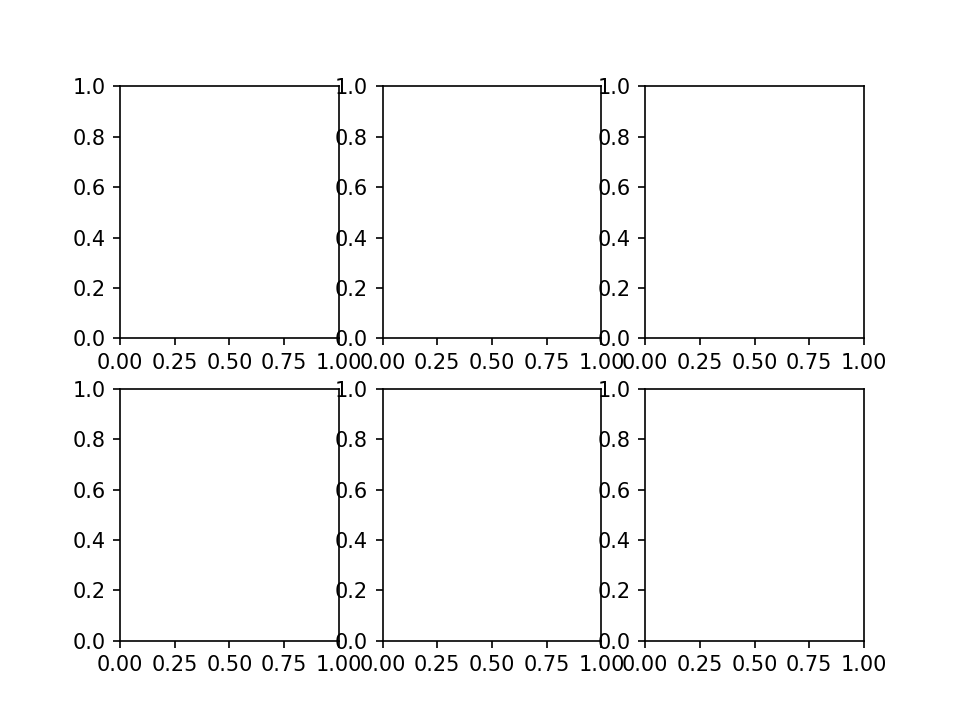

In [16]:
fig, axes = plt.subplots(2, 3)

The above returns a new figure and a `NumPy` array containing the created subplots. This is great since the array can be better indexed like a 2D array eg `axes[0, 2]` .

To adjust the spacing around subplots, one can use the `subplots_adjust` method on Figure objects as shown below.


In [19]:
plt.subplots_adjust(left=None, bottom=None, right=None, top= None, wspace= None, hspace= None)

<IPython.core.display.Javascript object>


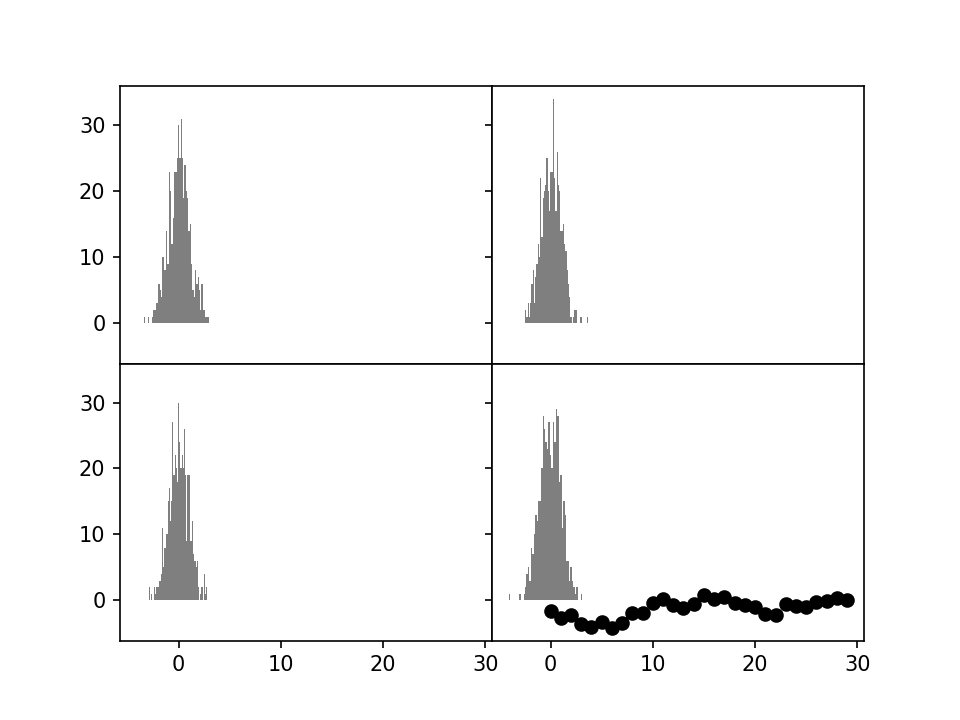

In [18]:
fig, axes = plt.subplots(2, 2,  sharex = True, sharey= True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins= 50,color= 'k', alpha=0.5)
plt.subplots_adjust(wspace= 0, hspace= 0)

**Colours, Markers and Line Styles.**

Matplotlib's plot takes an x,y array and strings for color eg `k--` for black  dashed ot `g--` for green dashed. Can use `linestyle` and color args explicitly eg `linestyle='--', color='g'`. Hex code is also supported. 

**Line Plots**

1. Have markers to highlight the actual data points.

<IPython.core.display.Javascript object>


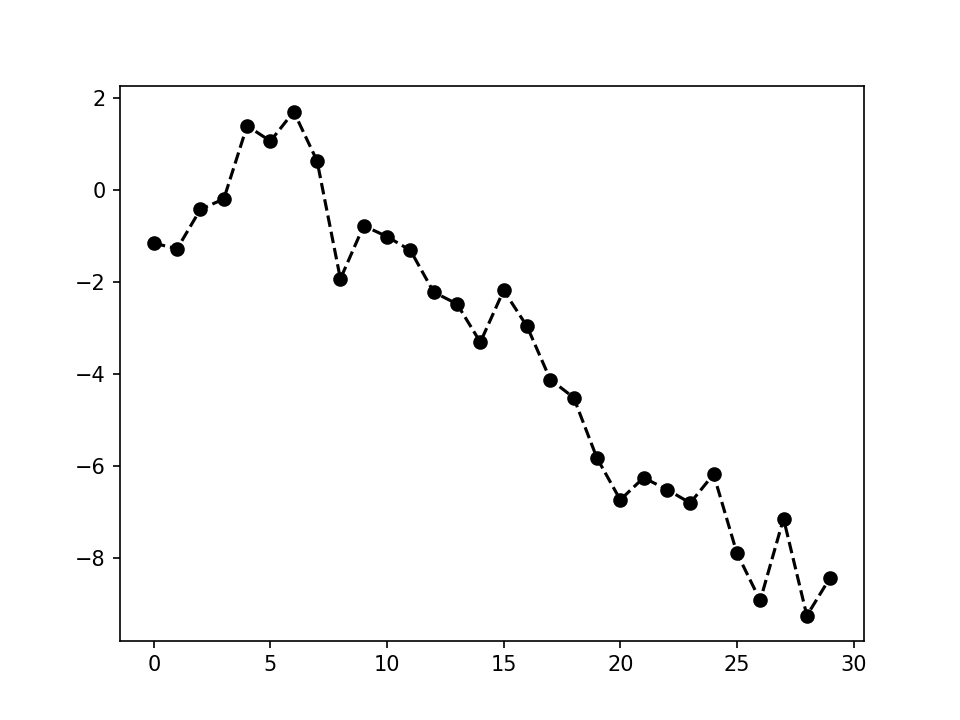

In [21]:
plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'ko--')

To override default linear interpolation of line points, alter the `drawstyle` arg.


In [23]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


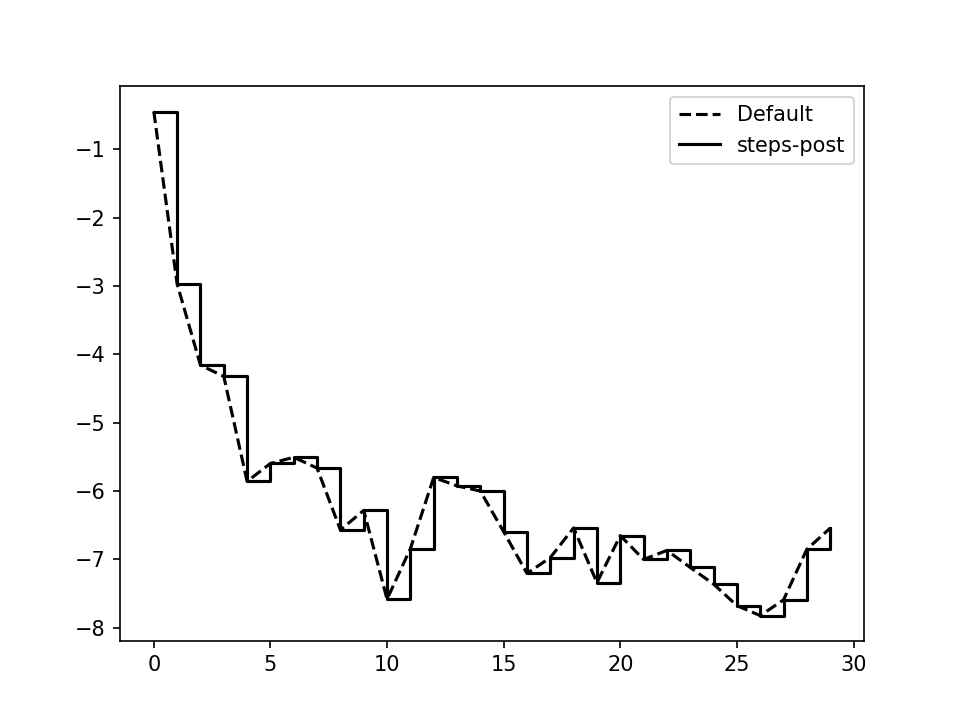

In [26]:
plt.figure()
plt.plot(data, 'k--', label= 'Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
# labels will only work if the legend is displayed
plt.legend(loc='best')

**Ticks, Labels and Legends.**


<IPython.core.display.Javascript object>


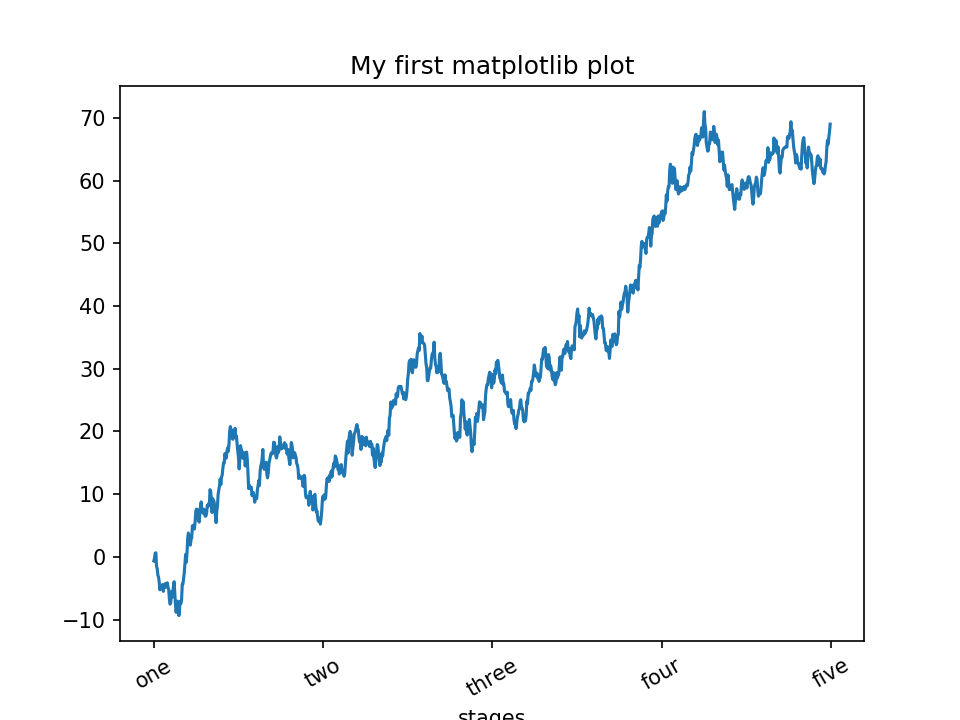

In [28]:
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [30]:
# change axis ticks
# use set_xticks
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation = 30,  fontsize= 'medium')

In [32]:
# batch set properties
props = {'title': 'My first matplotlib plot',
        'xlabel': 'stages'}
ax.set(**props)

[Text(0.5, 11.275325257644555, 'stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

<IPython.core.display.Javascript object>


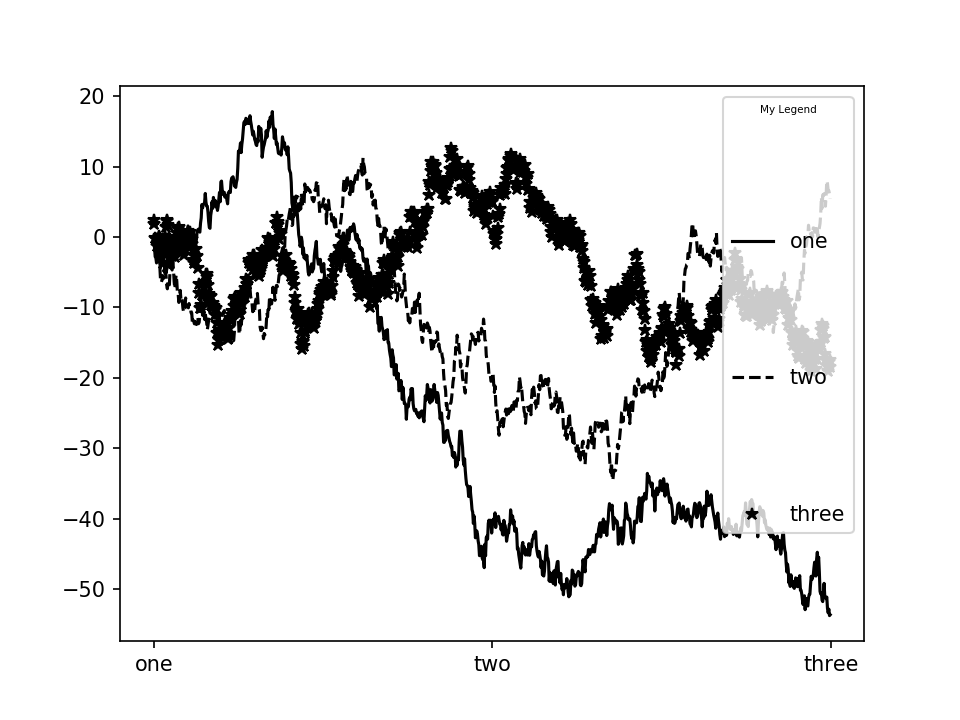

In [45]:
# set legends
fig = plt.figure() ; ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k*', label='three')

# add legend call plt.legend() or ax.legend()

ax.legend(loc = 'best')

ax.set_xticks([0, 500, 1000])
ax.set_xticklabels(['one', 'two', 'three'])
#ax.legend?
ax.legend(title="My Legend", labelspacing = 5.6, title_fontsize="5")

**Annotations and drawing on a subplot.**
Something like `geom_text`

In [46]:
from datetime import datetime

<IPython.core.display.Javascript object>


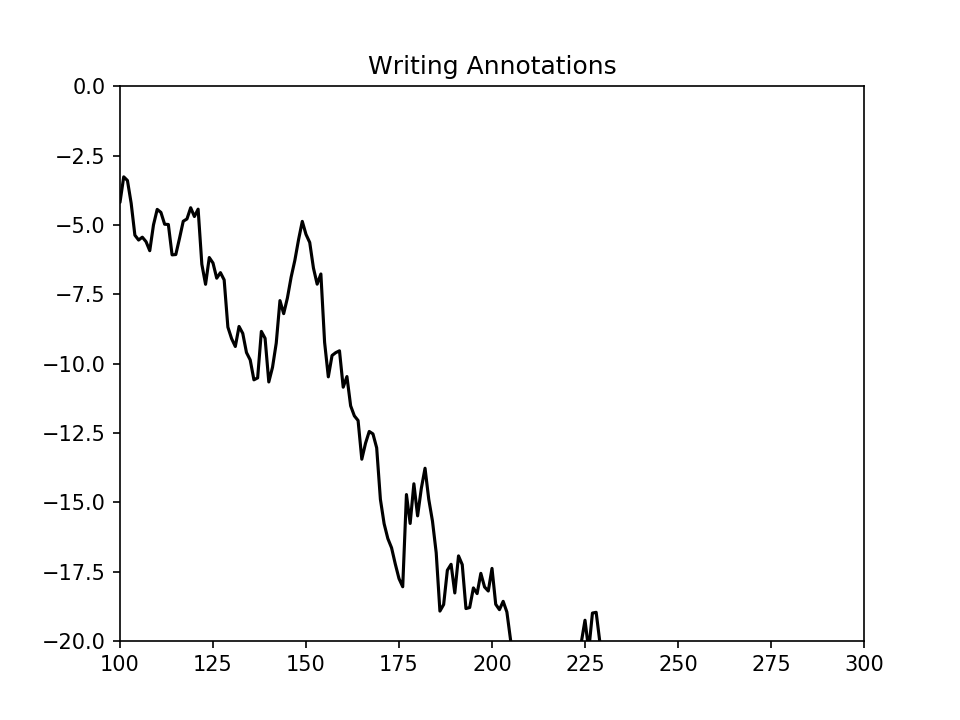

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
crisis_data = [
(datetime(2007, 10, 11), 'Peak of bull market'),
(datetime(2008, 3, 12), 'Bear Stearns Fails'),
(datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
ax.plot(np.random.randn(500).cumsum(), 'k-')
# can use annotate

`ax.annotate` draws labels at the indicated x and y coorinates.

In [68]:
ax.annotate("test",xy=(0,-20), xytext=(200, 0))
ax.set_title('Writing Annotations')
# zoom in or out
ax.set_xlim([100,300])
ax.set_ylim([-20,0])

(-20, 0)

Adding *patches* allows a user to add most of the common 
shapes.

<IPython.core.display.Javascript object>


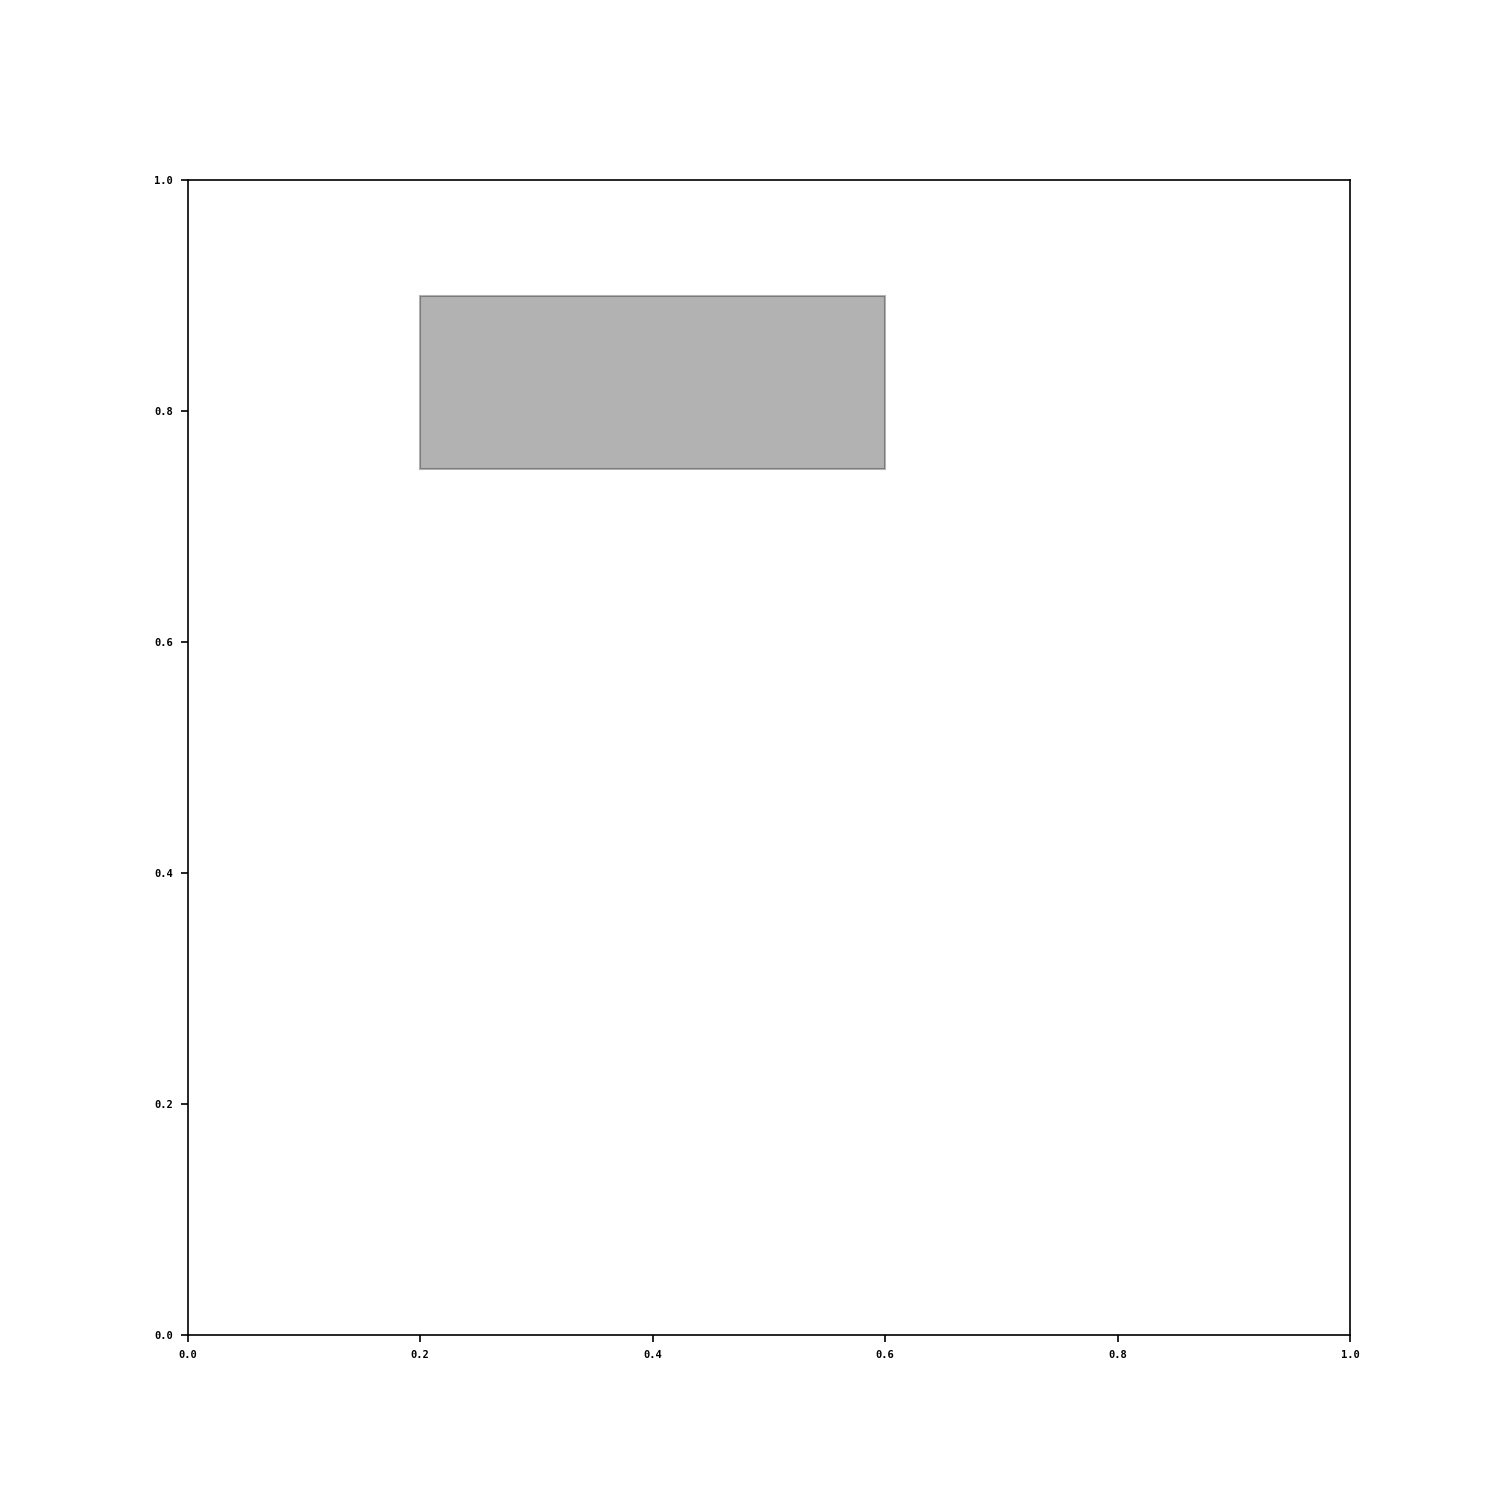

In [154]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
ax.add_patch(rect)

**Saving plots to file**

To save a plot to file, we can use `plt.save()`. This provides pdf output. To save an image as `svg`, we can use the `savefig` instance and provide the desired output via extension.

In [146]:
plt.savefig("testfig.png")

To save with futher arguments e.g controling dpi(dots per inch), we can use the following: 

In [147]:
plt.savefig("testfig.png", dpi=400, bbox_inches='tight')

**matplotlib config**

To modify the config, we can use the `rc` method to for instance set the global default fig size.


In [150]:
plt.rc('figure', figsize= (10, 10))
font_options = {'family': 'monospace', 'weight': 'bold', 
               'size': 5}
plt.rc('font', **font_options)

**Plotting with pandas and seaborn**

While matlotlib is more low level, `pandas` and `seaborn` provide a more high level like option to make plots. 


- **Line Plots**

<IPython.core.display.Javascript object>


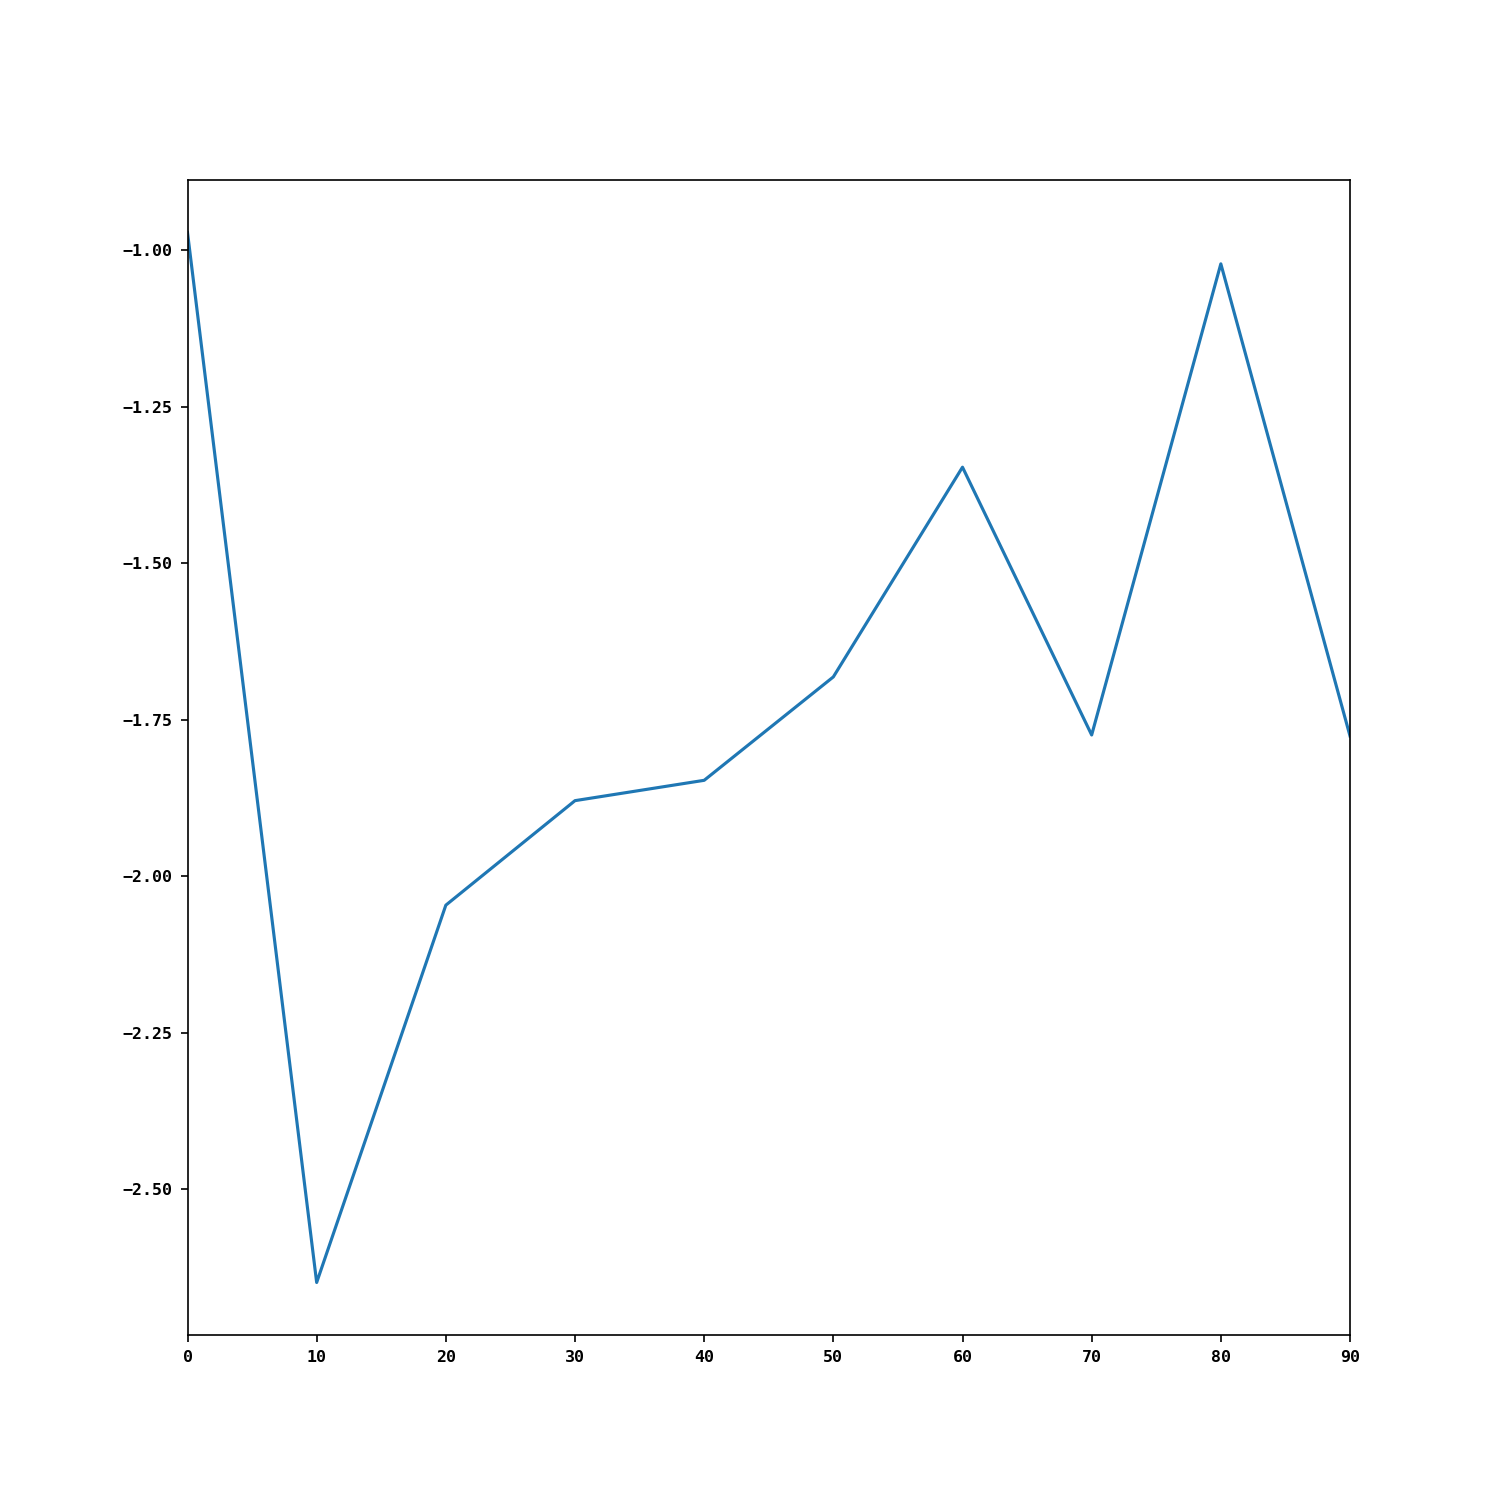

In [157]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
# call pandas plot method
plt.figure()
s.plot()
plt.show()

In [156]:
plt.rc('font', size = 8)

<IPython.core.display.Javascript object>


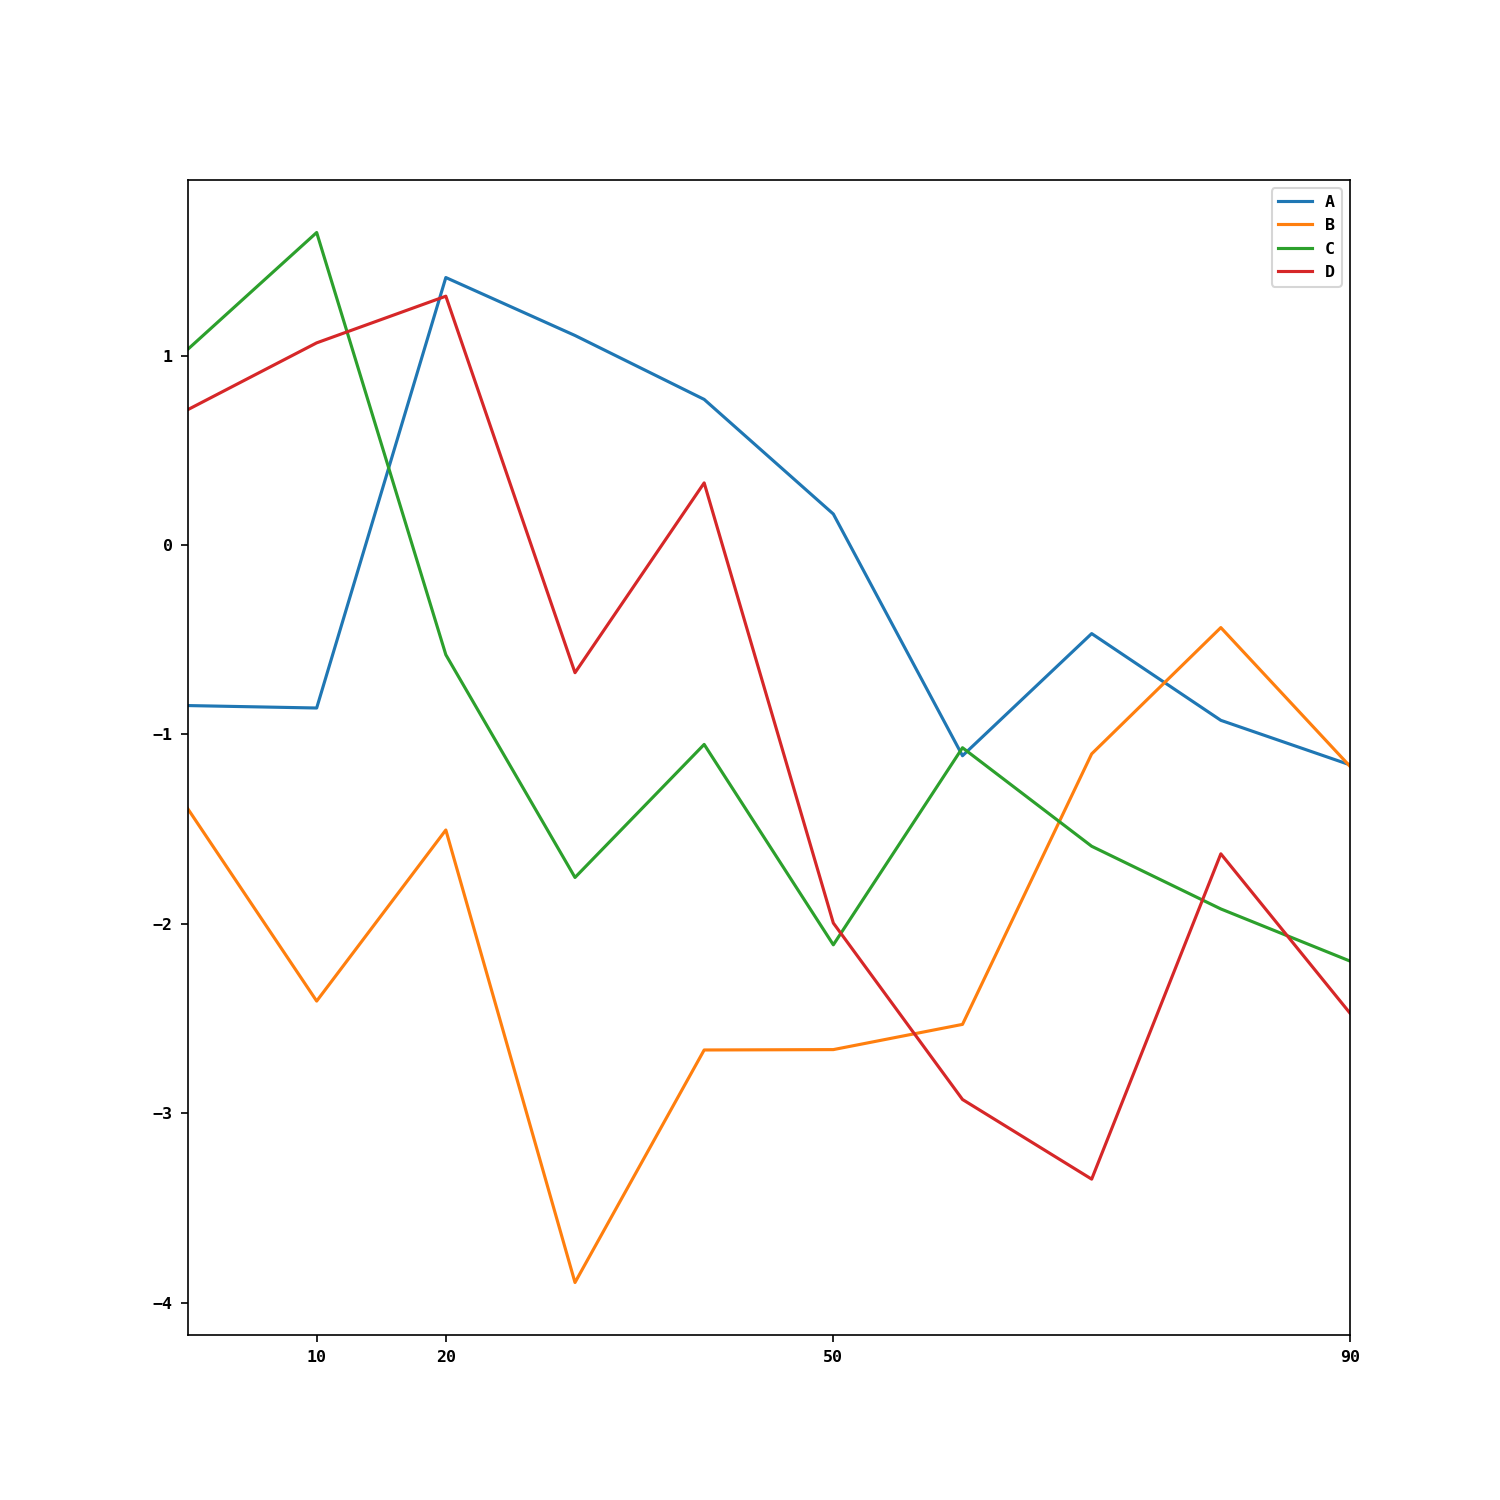

In [166]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns = ['A', 'B', 'C','D'],
                 index = np.arange(0, 100, 10))
df.plot(logy = False, xticks= [10, 20, 50,90])

- **Bar Plots**

<IPython.core.display.Javascript object>


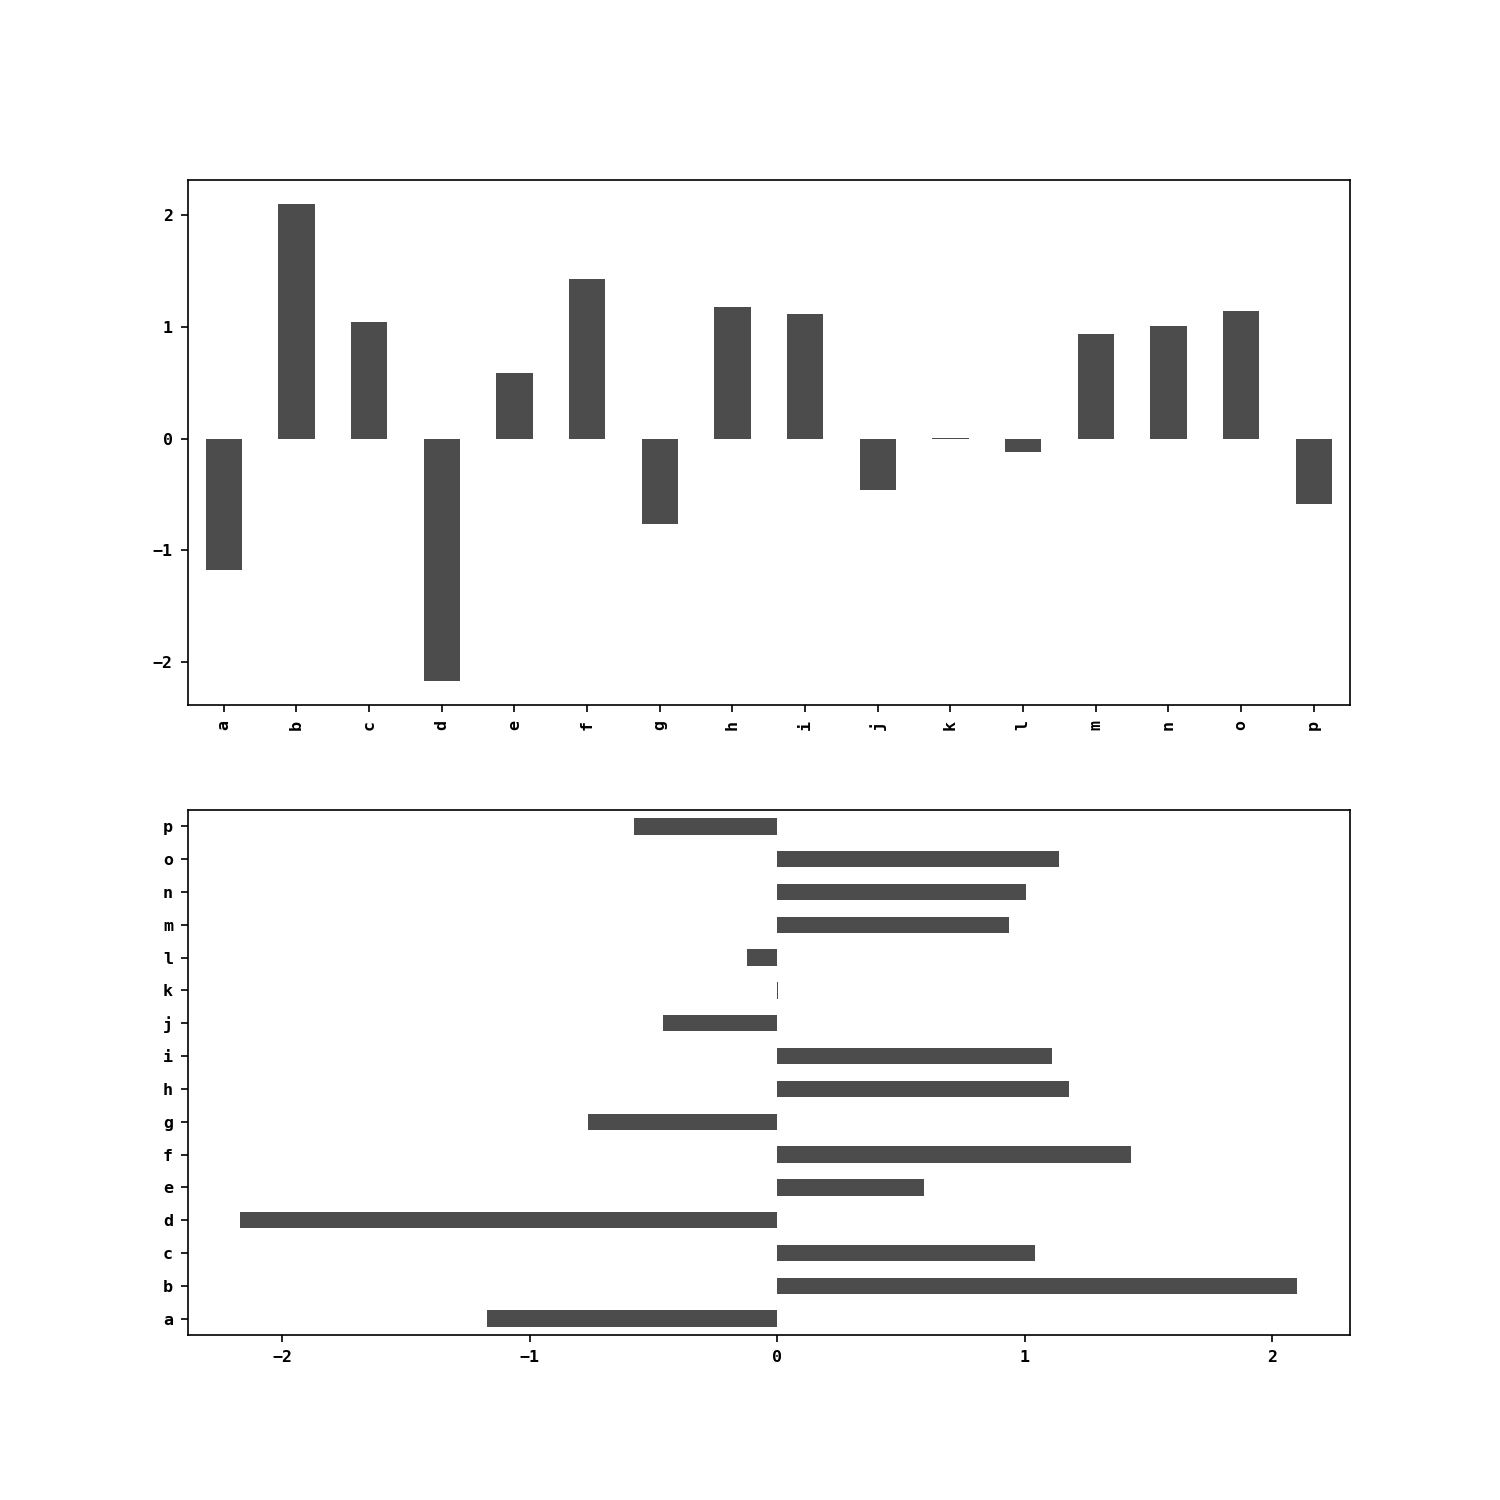

In [168]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index= list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
# horiz
data.plot.barh(ax=axes[1], color='k', alpha =0.7)

- **Grouped bar plot**

In [171]:
df = pd.DataFrame(np.random.randn(6, 4), 
                  index = ['one', 'two', 'three', 'four', 
                           'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'],
                                   name = 'Genus'))
df.head()

Genus,A,B,C,D
one,0.699523,0.630559,1.290325,-1.246167
two,0.117928,0.699943,0.169232,1.336728
three,0.630714,0.734494,0.154690,0.017782
four,1.267422,-0.210937,-1.030951,0.720780
five,1.648329,0.576624,-0.762238,-0.420174


<IPython.core.display.Javascript object>


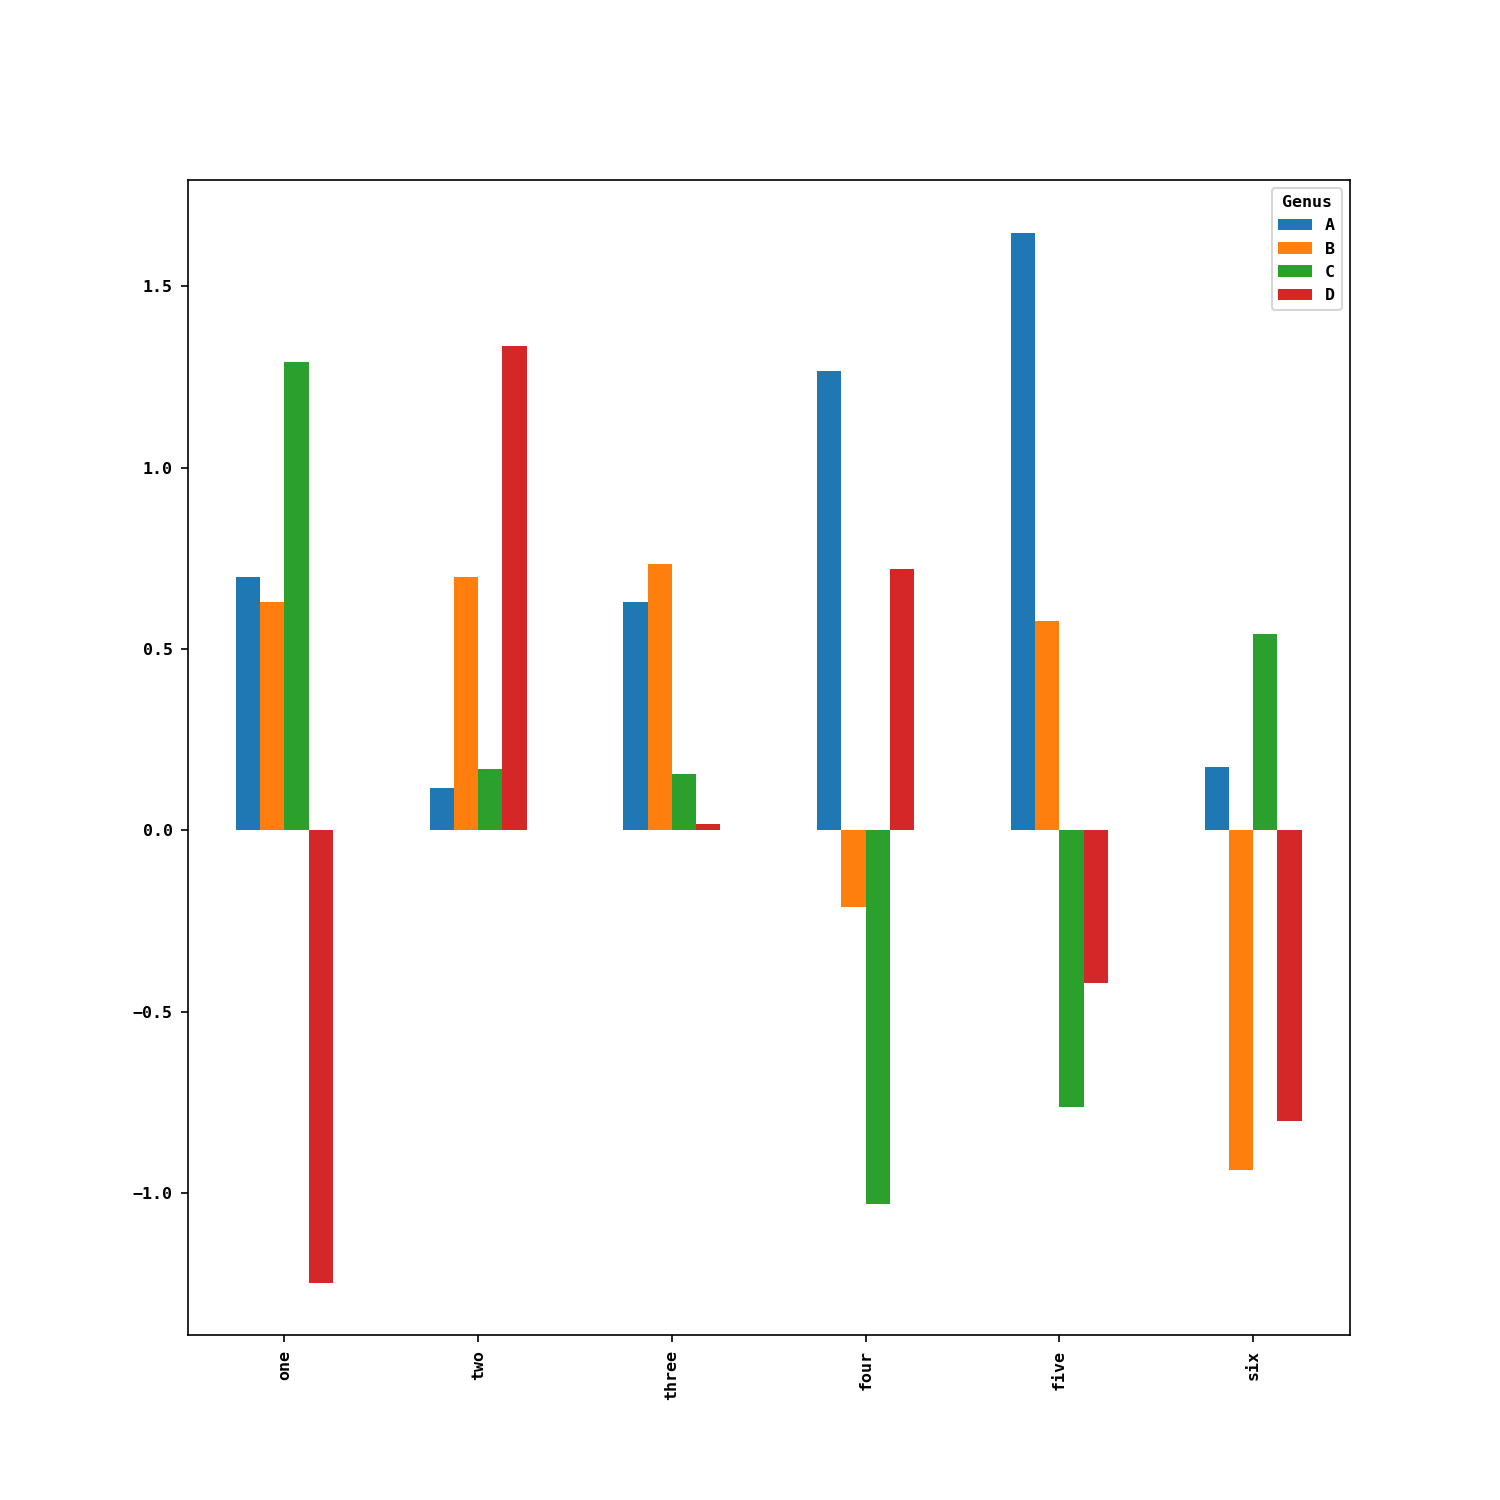

In [172]:
df.plot.bar()
# name of the df gives legend title


- **Stacked Plots**


<IPython.core.display.Javascript object>


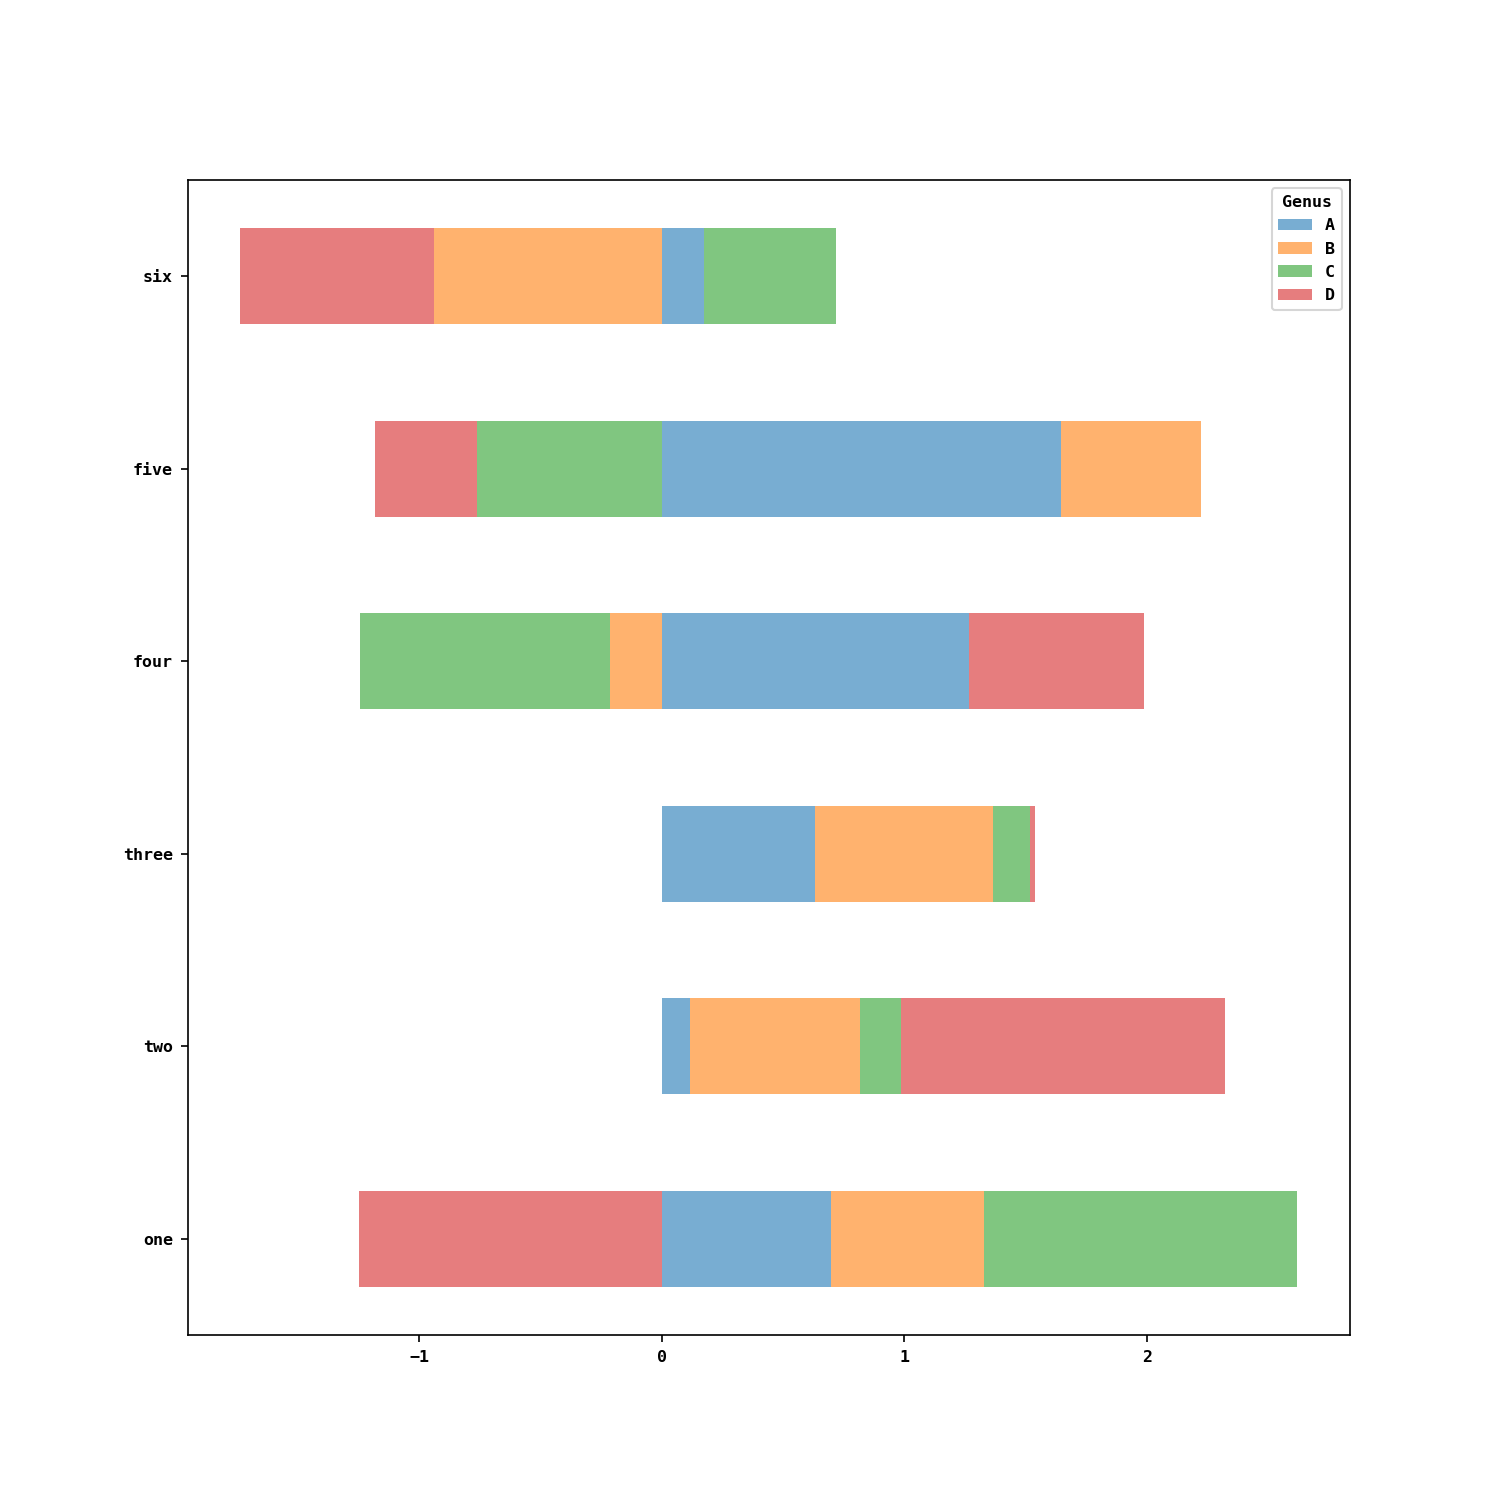

In [196]:
# set stacked to true
df.plot.barh(stacked=True, alpha=0.6)

In [204]:
from numpy import nan
tips = pd.DataFrame({'size': {0: 'day', 1: 'Fri', 2: 'Sat', 3: 'Sun', 4: 'Thur'},
 '2': {0: nan, 1: 0.8888889999999999, 2: 0.623529, 3: 0.52, 4: 0.827586},
 '3': {0: nan, 1: 0.055555999999999994, 2: 0.211765, 3: 0.2, 4: 0.068966},
 '4': {0: nan,
  1: 0.055555999999999994,
  2: 0.15294100000000002,
  3: 0.24,
  4: 0.086207},
 '5': {0: nan, 1: 0.0, 2: 0.011765000000000001, 3: 0.04, 4: 0.017241}})

In [213]:
tips.iloc[0] = np.nan
tips.dropna(inplace=True)
tips

,size,2,3,4,5
2,Sat,0.623529,0.211765,0.152941,0.011765
3,Sun,0.520000,0.200000,0.240000,0.040000
4,Thur,0.827586,0.068966,0.086207,0.017241


In [235]:
# Use good old iris
import seaborn as sns
iris = sns.load_dataset("iris")


In [237]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [240]:
sl_counts = pd.crosstab(iris['species'], iris['sepal_length'])

<IPython.core.display.Javascript object>


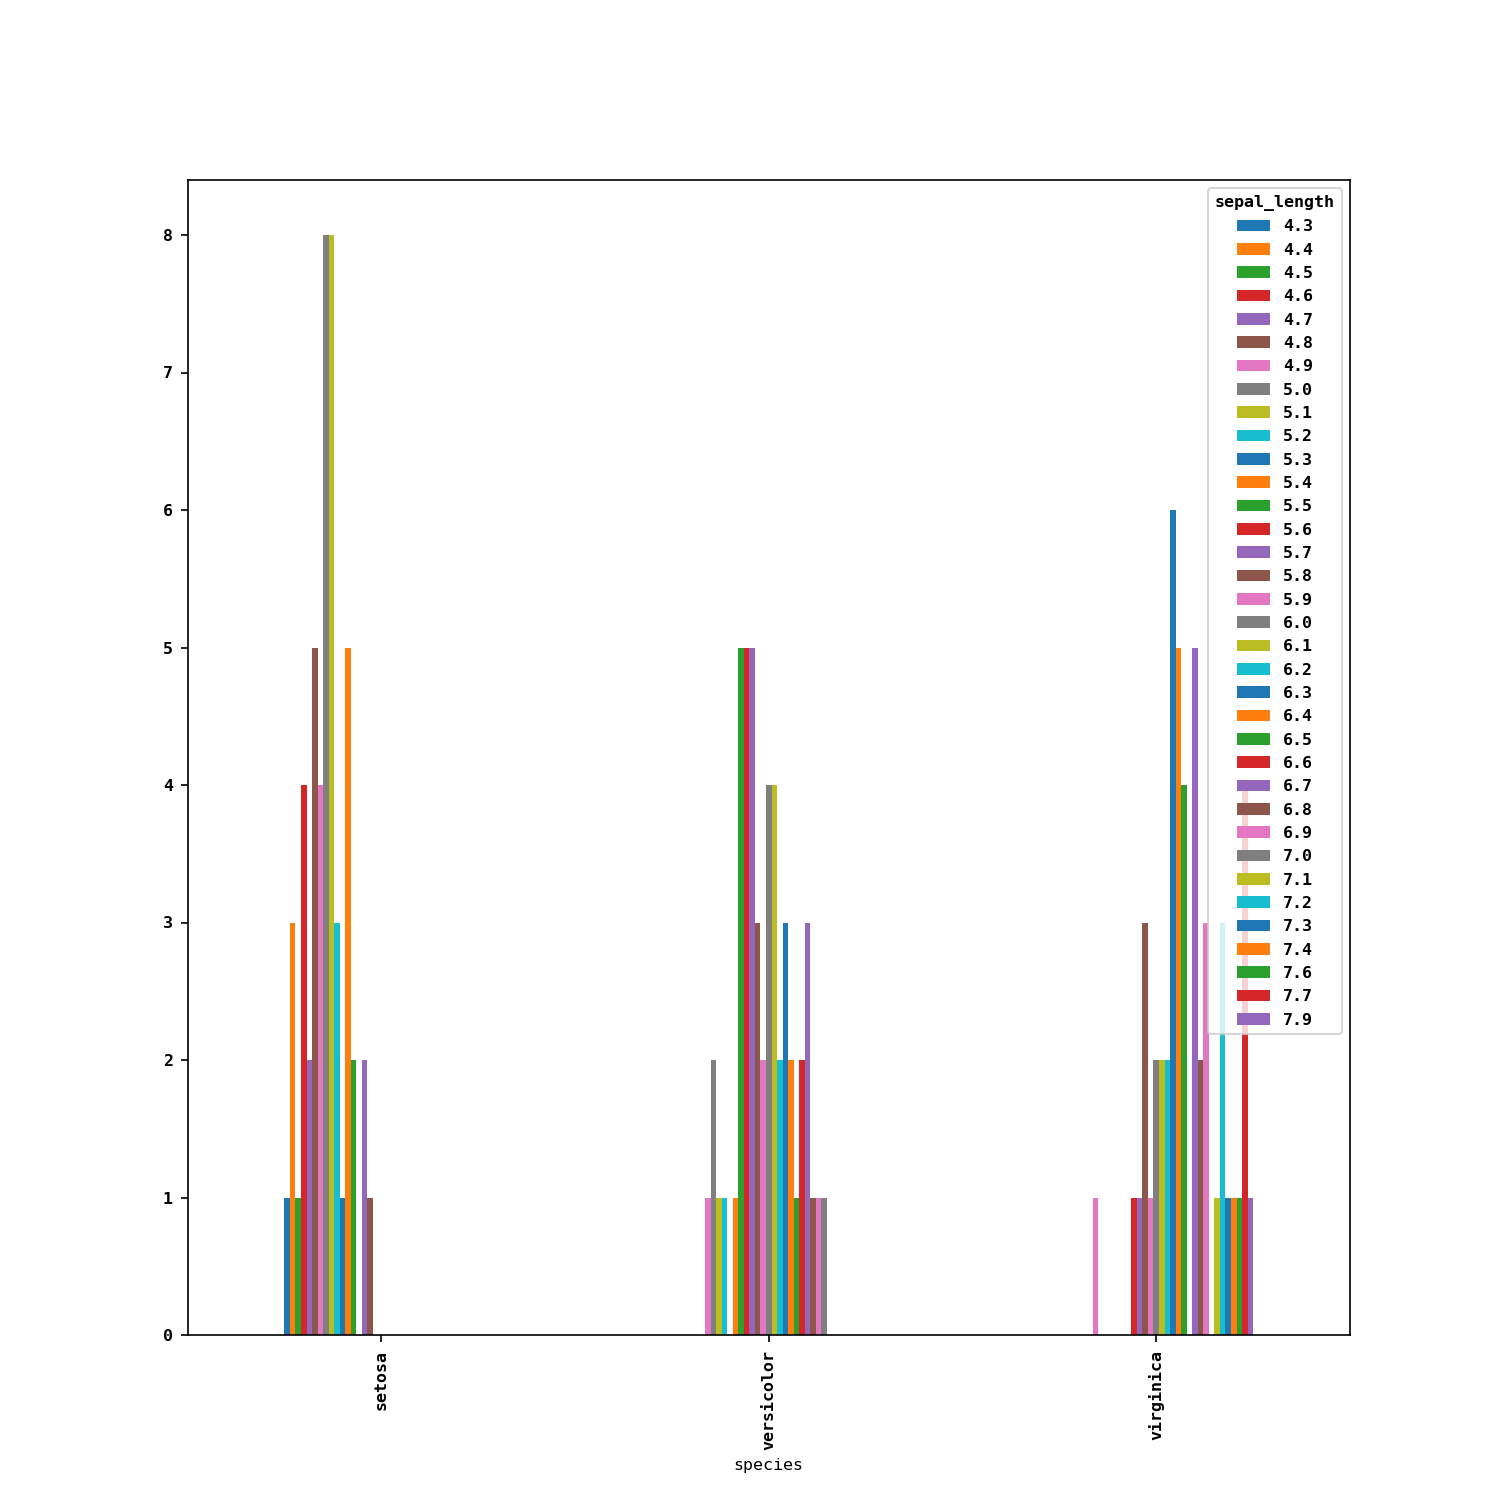

In [247]:
sl_counts.plot.bar()

<IPython.core.display.Javascript object>


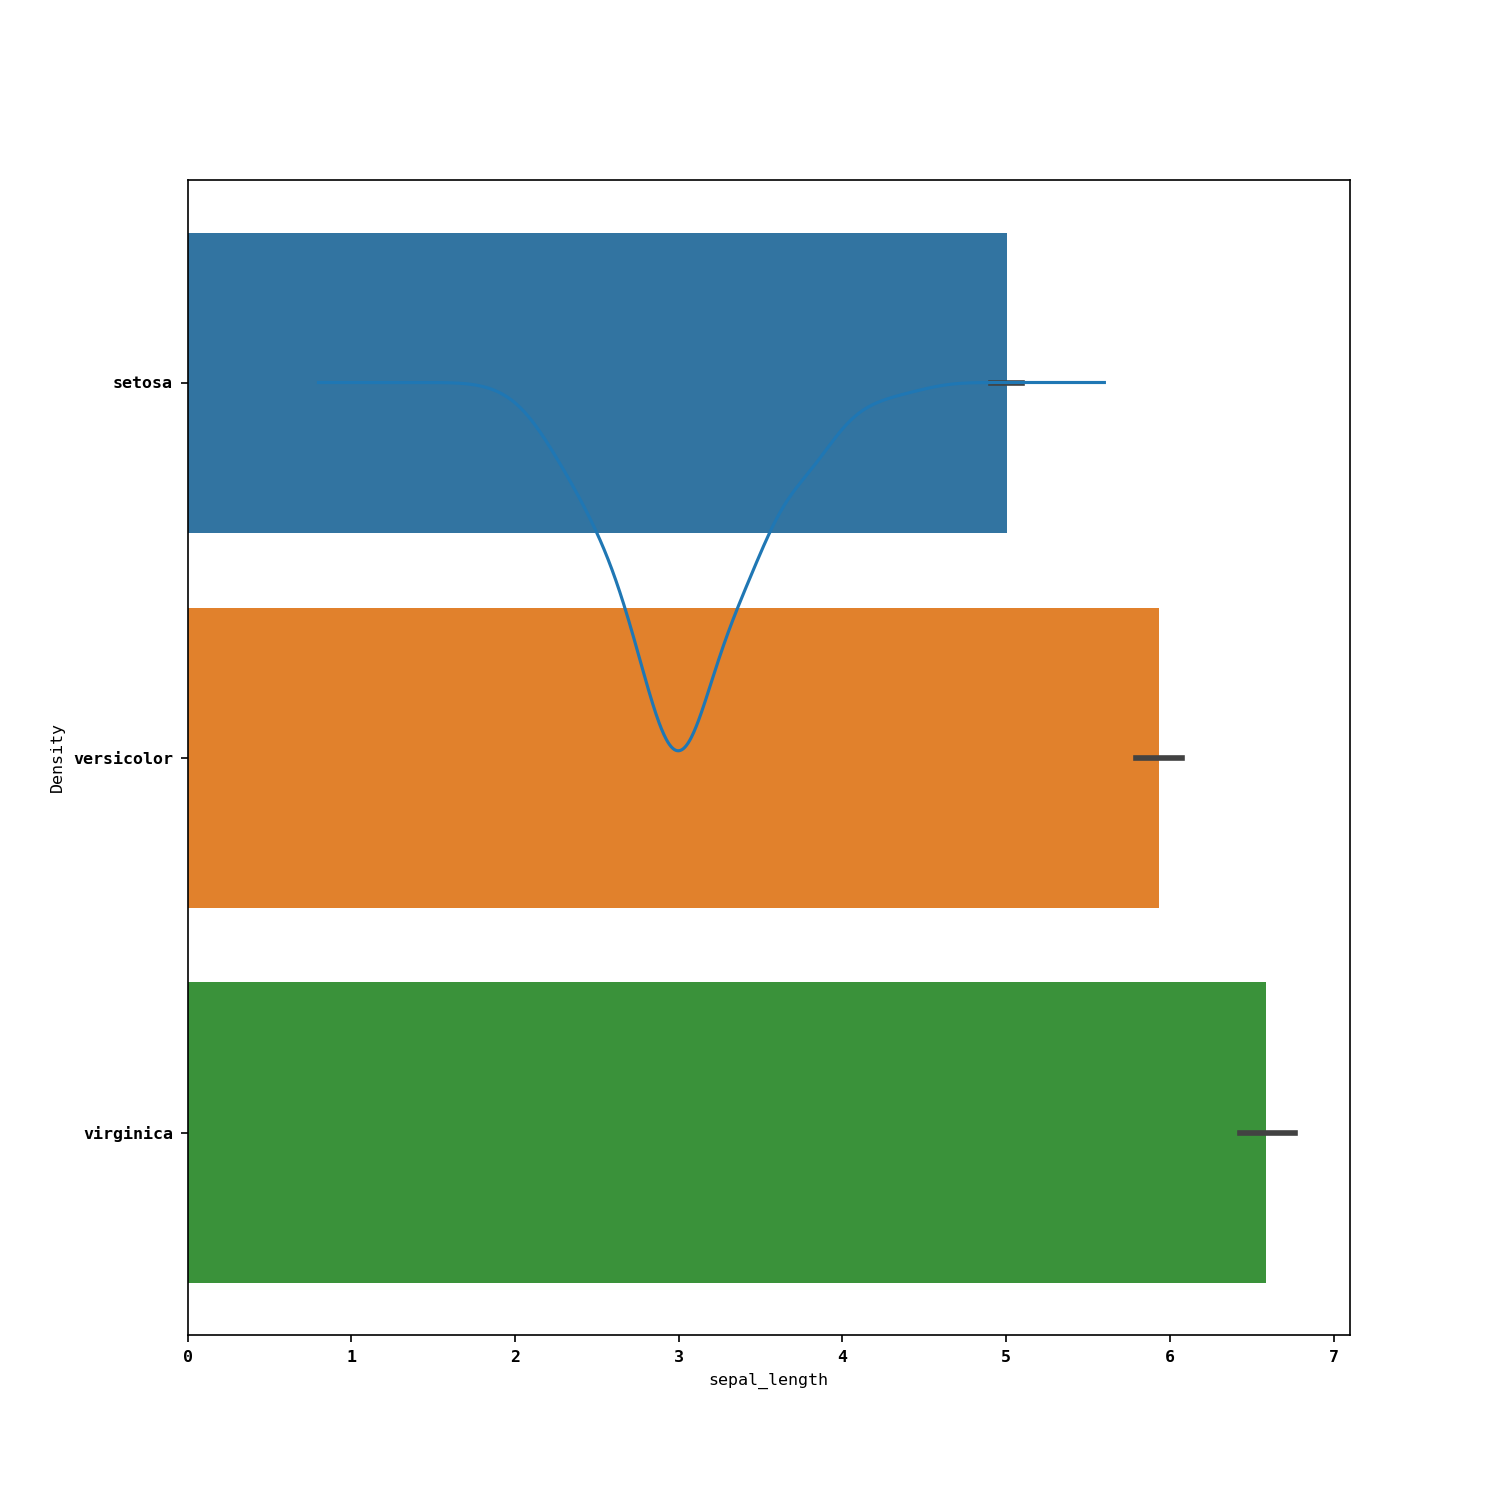

In [262]:
# plot with sns
plt.figure()
sns.barplot(y='species', x='sepal_length', data=iris, 
            orient= 'h')


- **Histograms and density plots**


<IPython.core.display.Javascript object>


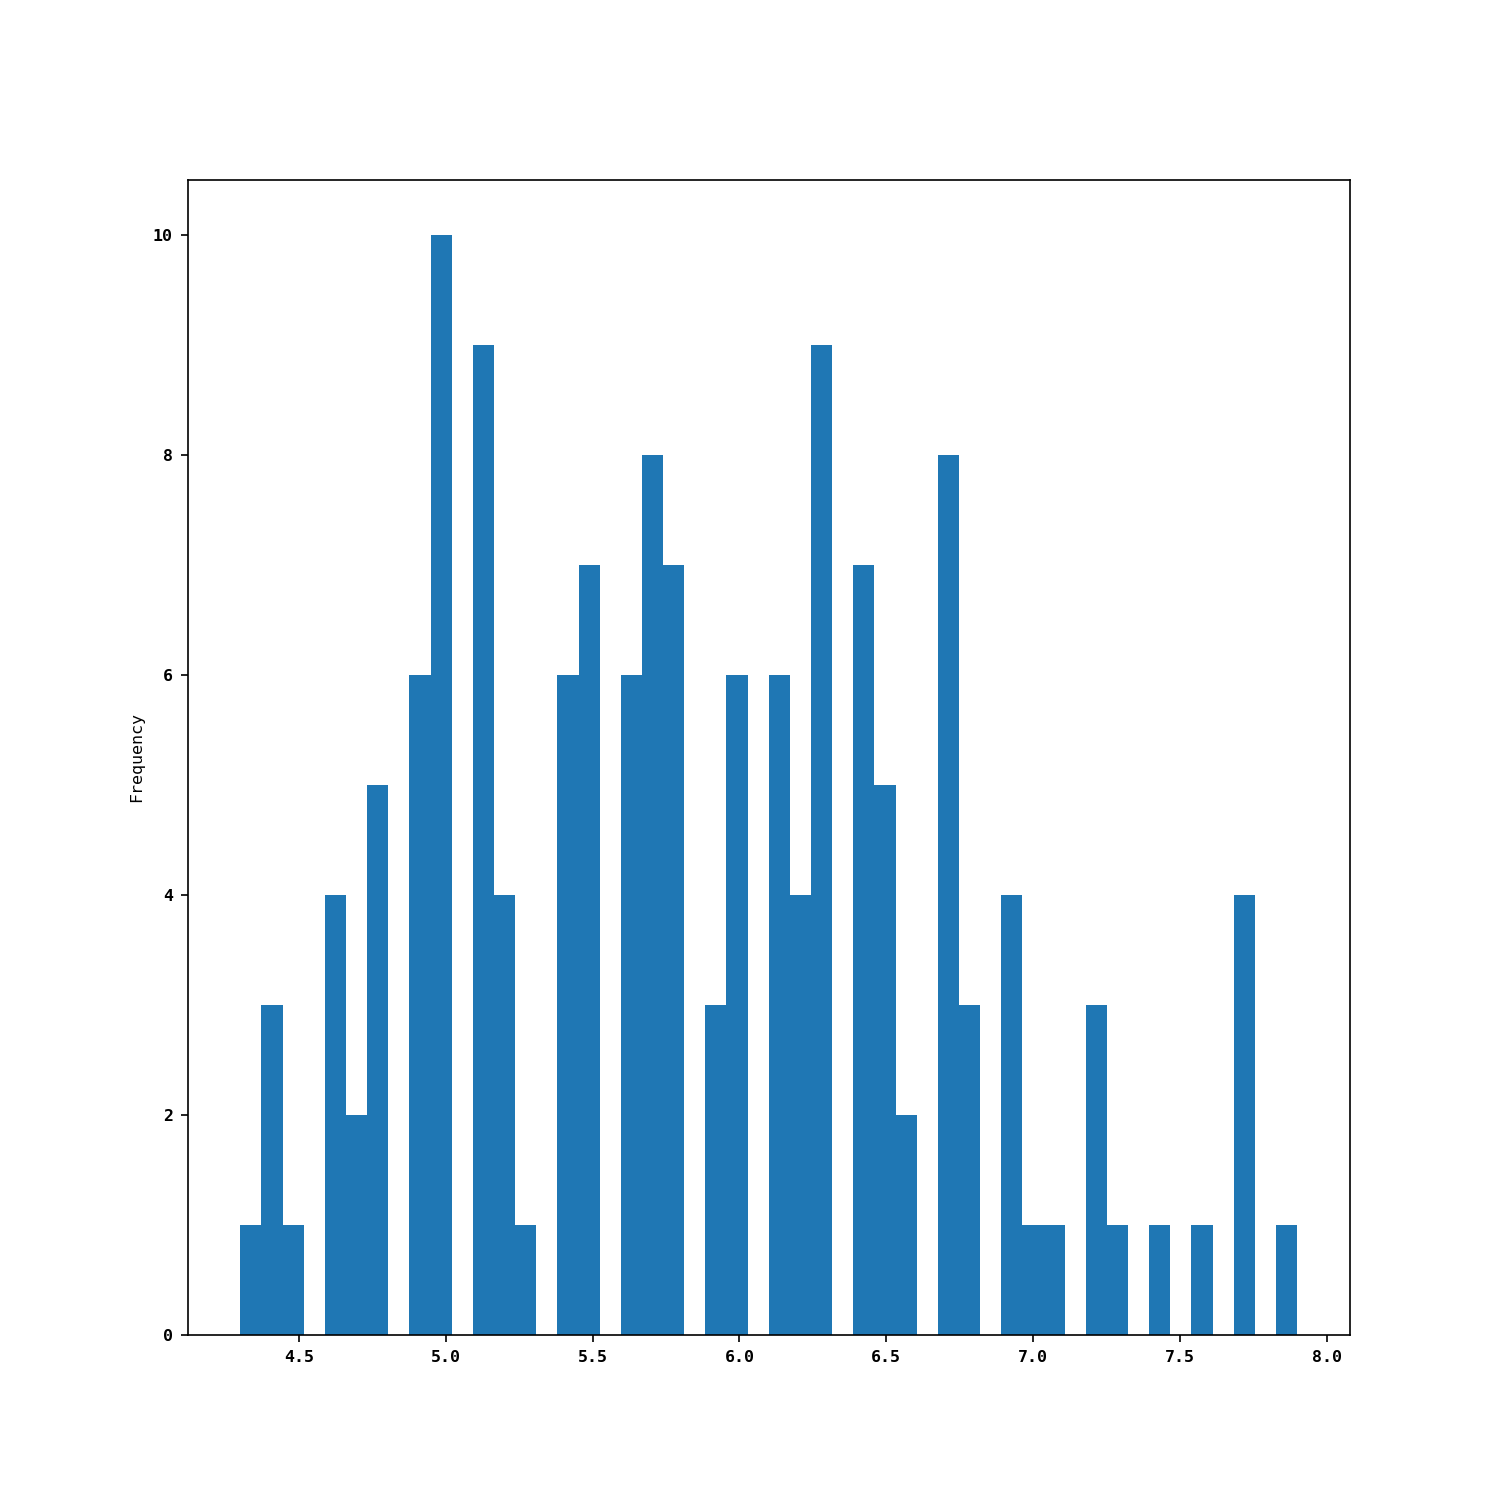

In [261]:
plt.figure()
iris['sepal_length'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


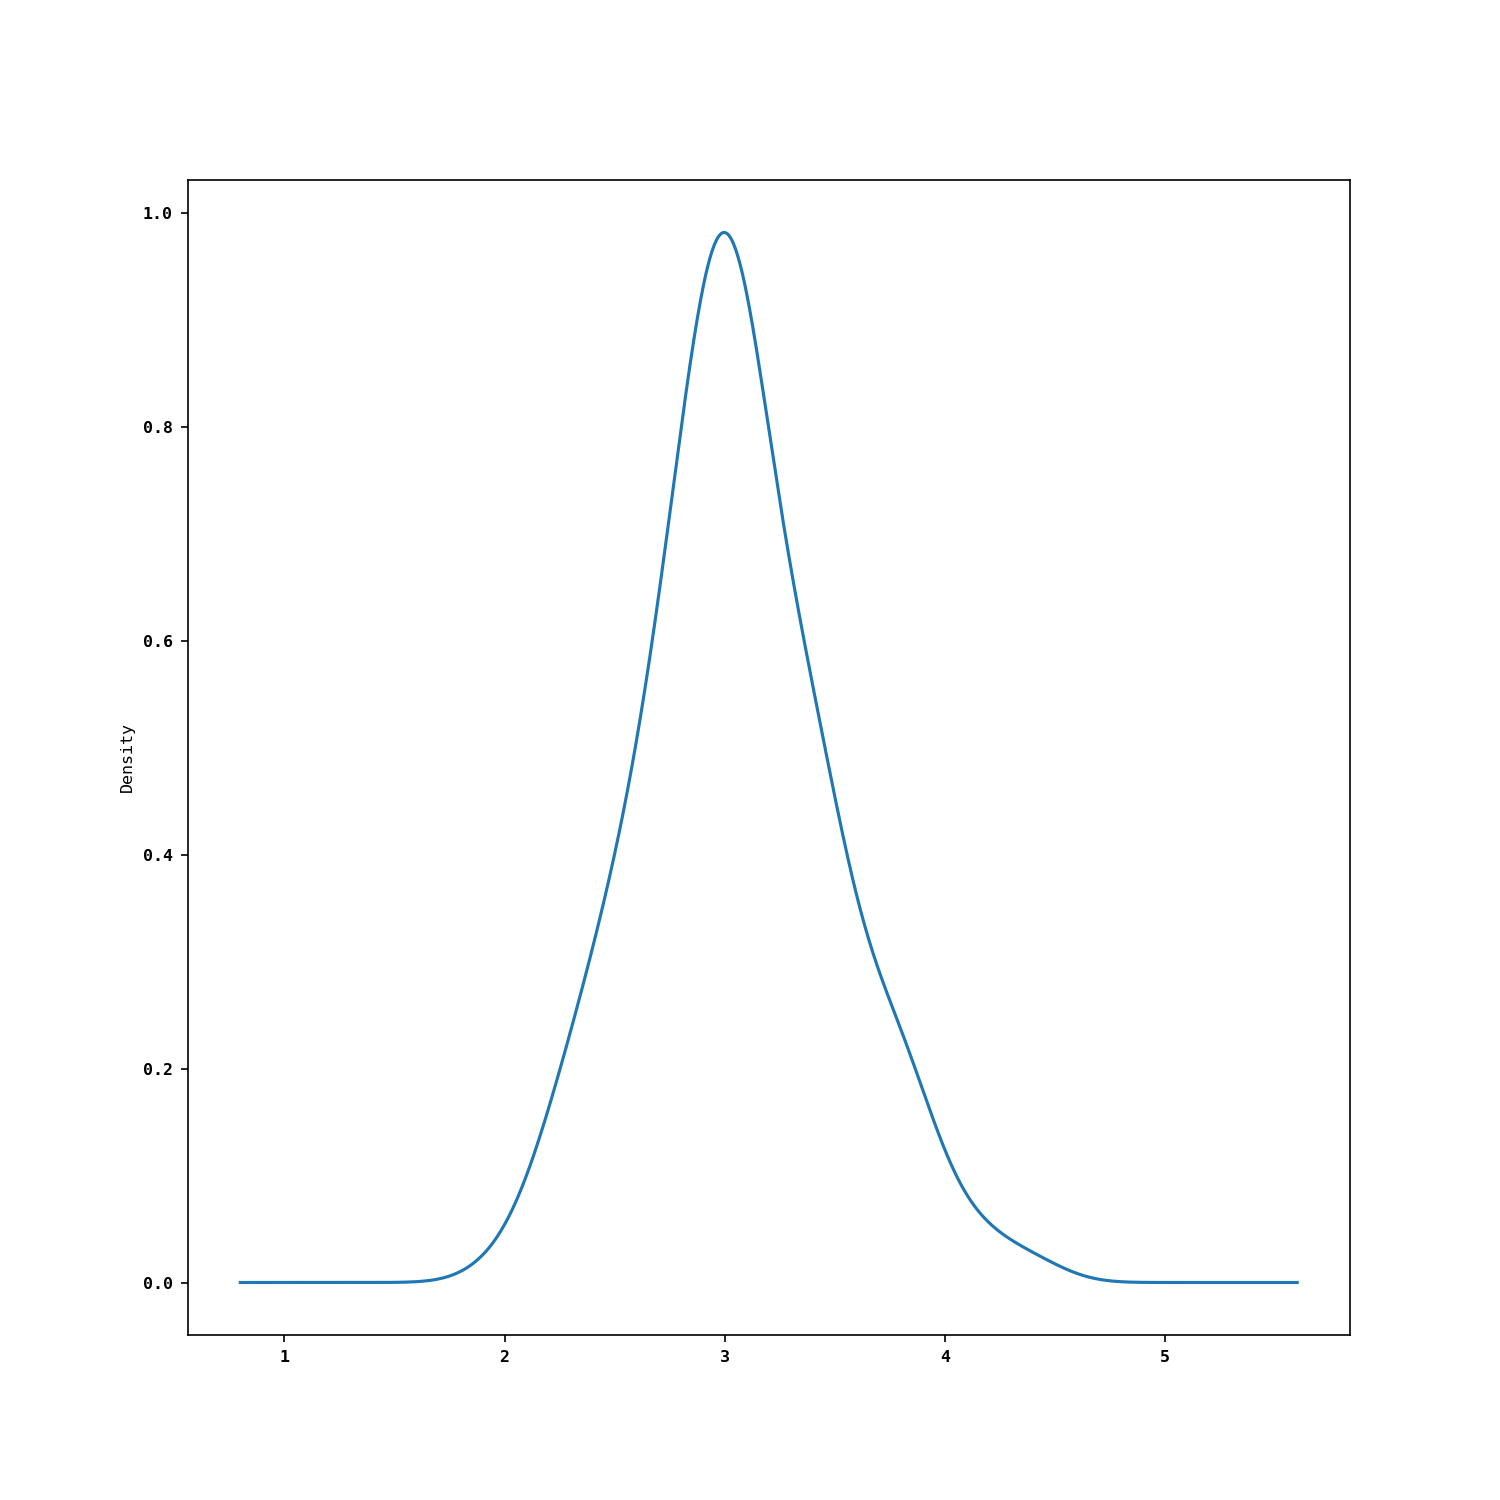

In [268]:
# a density plot
# ah, plt.figure each time, there must be something simpler
plt.figure()
iris['sepal_width'].plot.density()

In [301]:
# with seaborn
comp1 = np.random.normal(0, 1, size= 200)
comp2 = np.random.normal(10, 2, size= 200)
values = pd.Series(np.concatenate([comp1, comp2]))
values

0       0.034639
1      -0.158433
2      -0.157543
3       0.177166
4       0.339194
5       0.146416
6      -0.604913
7      -0.605082
8       0.049275
9      -0.802155
10      0.031219
11     -1.123579
12     -0.054580
13      0.256637
14      0.454834
15     -1.475703
16     -0.294488
17     -0.388404
18     -0.074105
19      1.095755
20     -0.230124
21     -0.951989
22     -0.549690
23      1.106226
24      1.693199
25     -0.046876
26     -0.643144
27     -0.956605
28     -0.917895
29      0.356987
         ...    
370     8.614717
371    10.488186
372     7.217382
373    11.754310
374     6.139668
375    11.241678
376    11.509699
377     7.536646
378    12.061459
379    11.766090
380     7.922392
381     9.342072
382     7.925667
383    11.549968
384    14.735112
385     4.883158
386     7.960190
387    10.295975
388     7.684160
389    10.197195
390     6.396083
391     5.805444
392    11.526999
393    11.528563
394     9.076408
395    10.184955
396     6.844324
397     9.4278

<IPython.core.display.Javascript object>


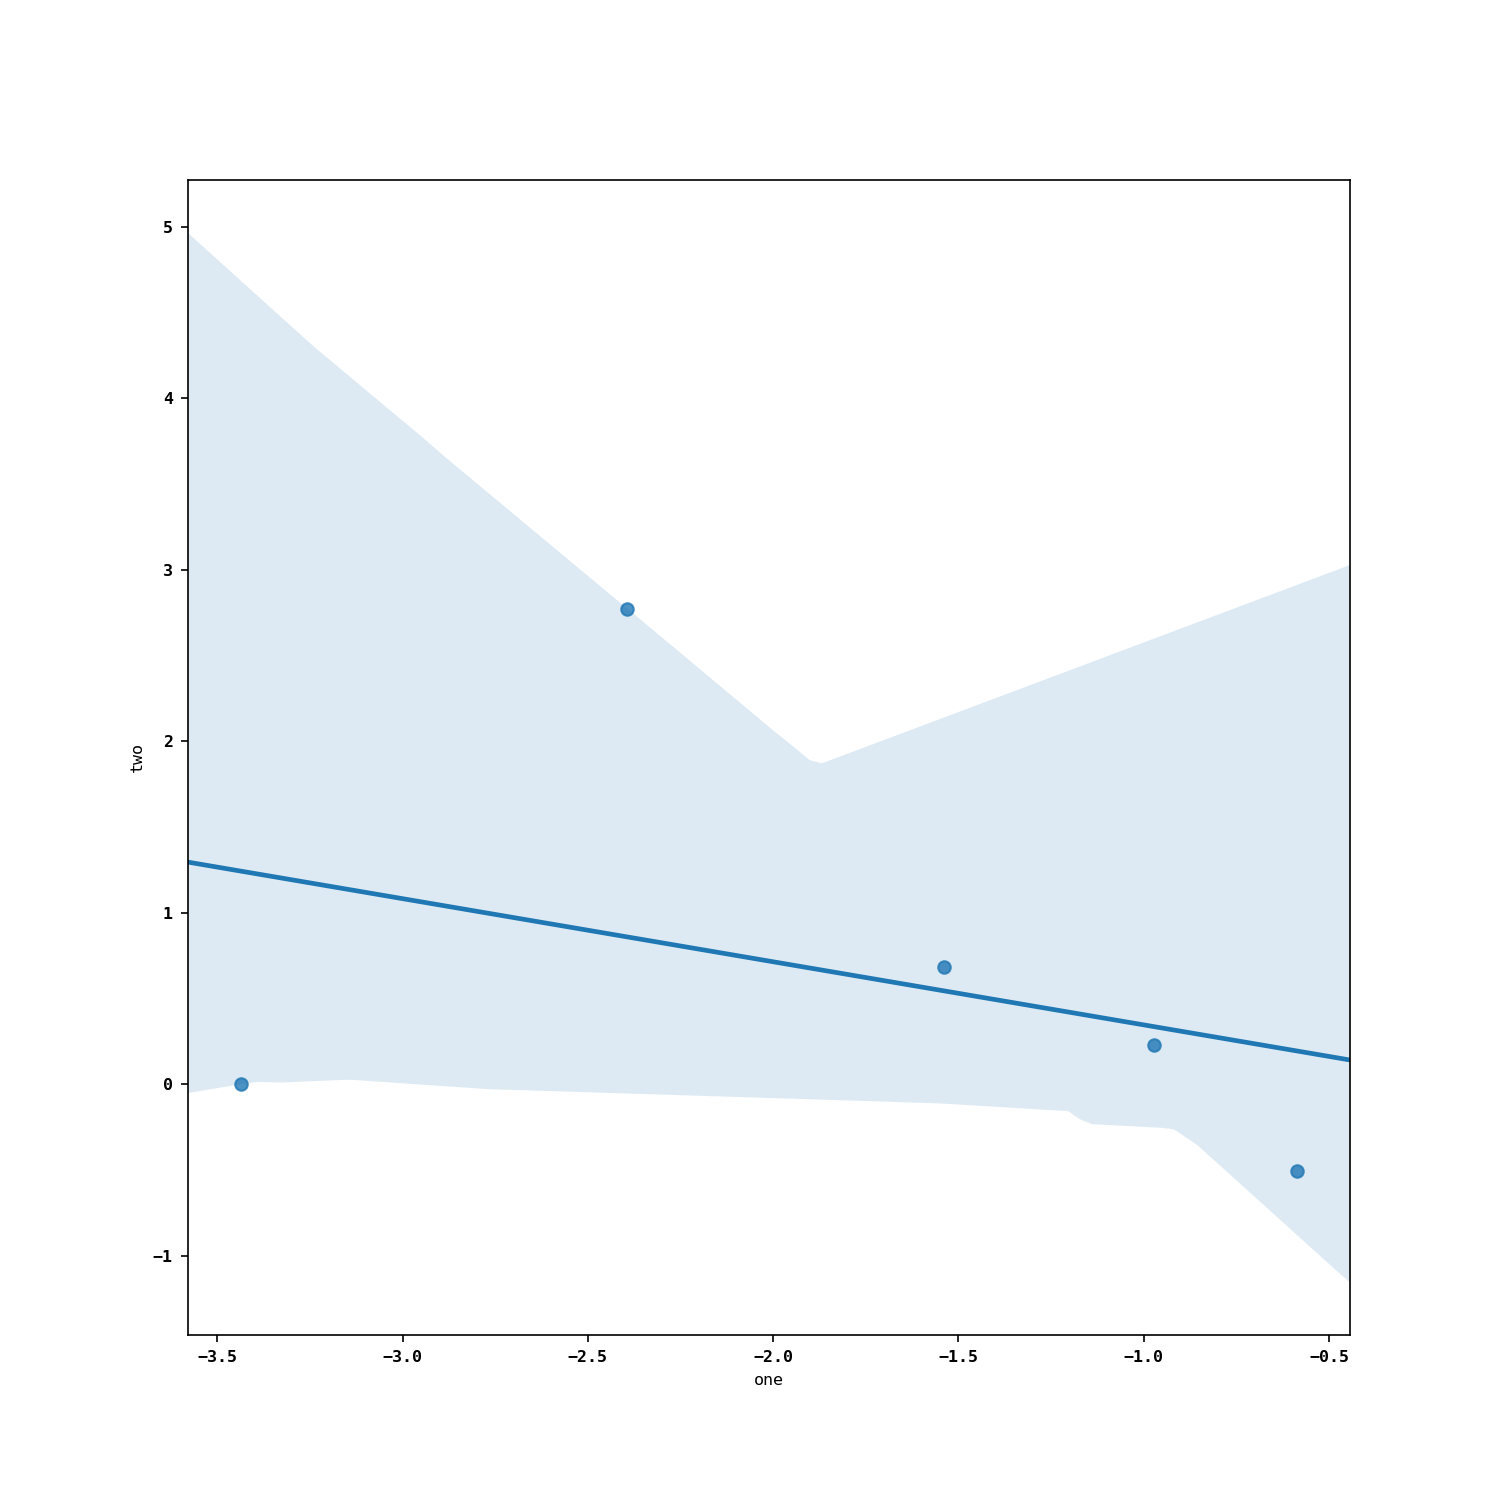

In [271]:
plt.figure()
sns.distplot(values, bins=100, color='k')

In [283]:
# scatters
reshaped = np.log(abs(values)).diff().dropna()[:20].values.reshape(5,4)

In [302]:
df = pd.DataFrame(reshaped, columns = ['one', 'two', 'three',
                                 'four'])

df[-4:]

,one,two,three,four
1,-2.394783,2.767460,-0.551254,1.152086
2,-3.437359,-0.000822,2.250774,1.227024
3,-1.537883,0.684506,0.007943,-0.757264
4,-0.586336,-0.503905,2.802400,-2.739950


<IPython.core.display.Javascript object>


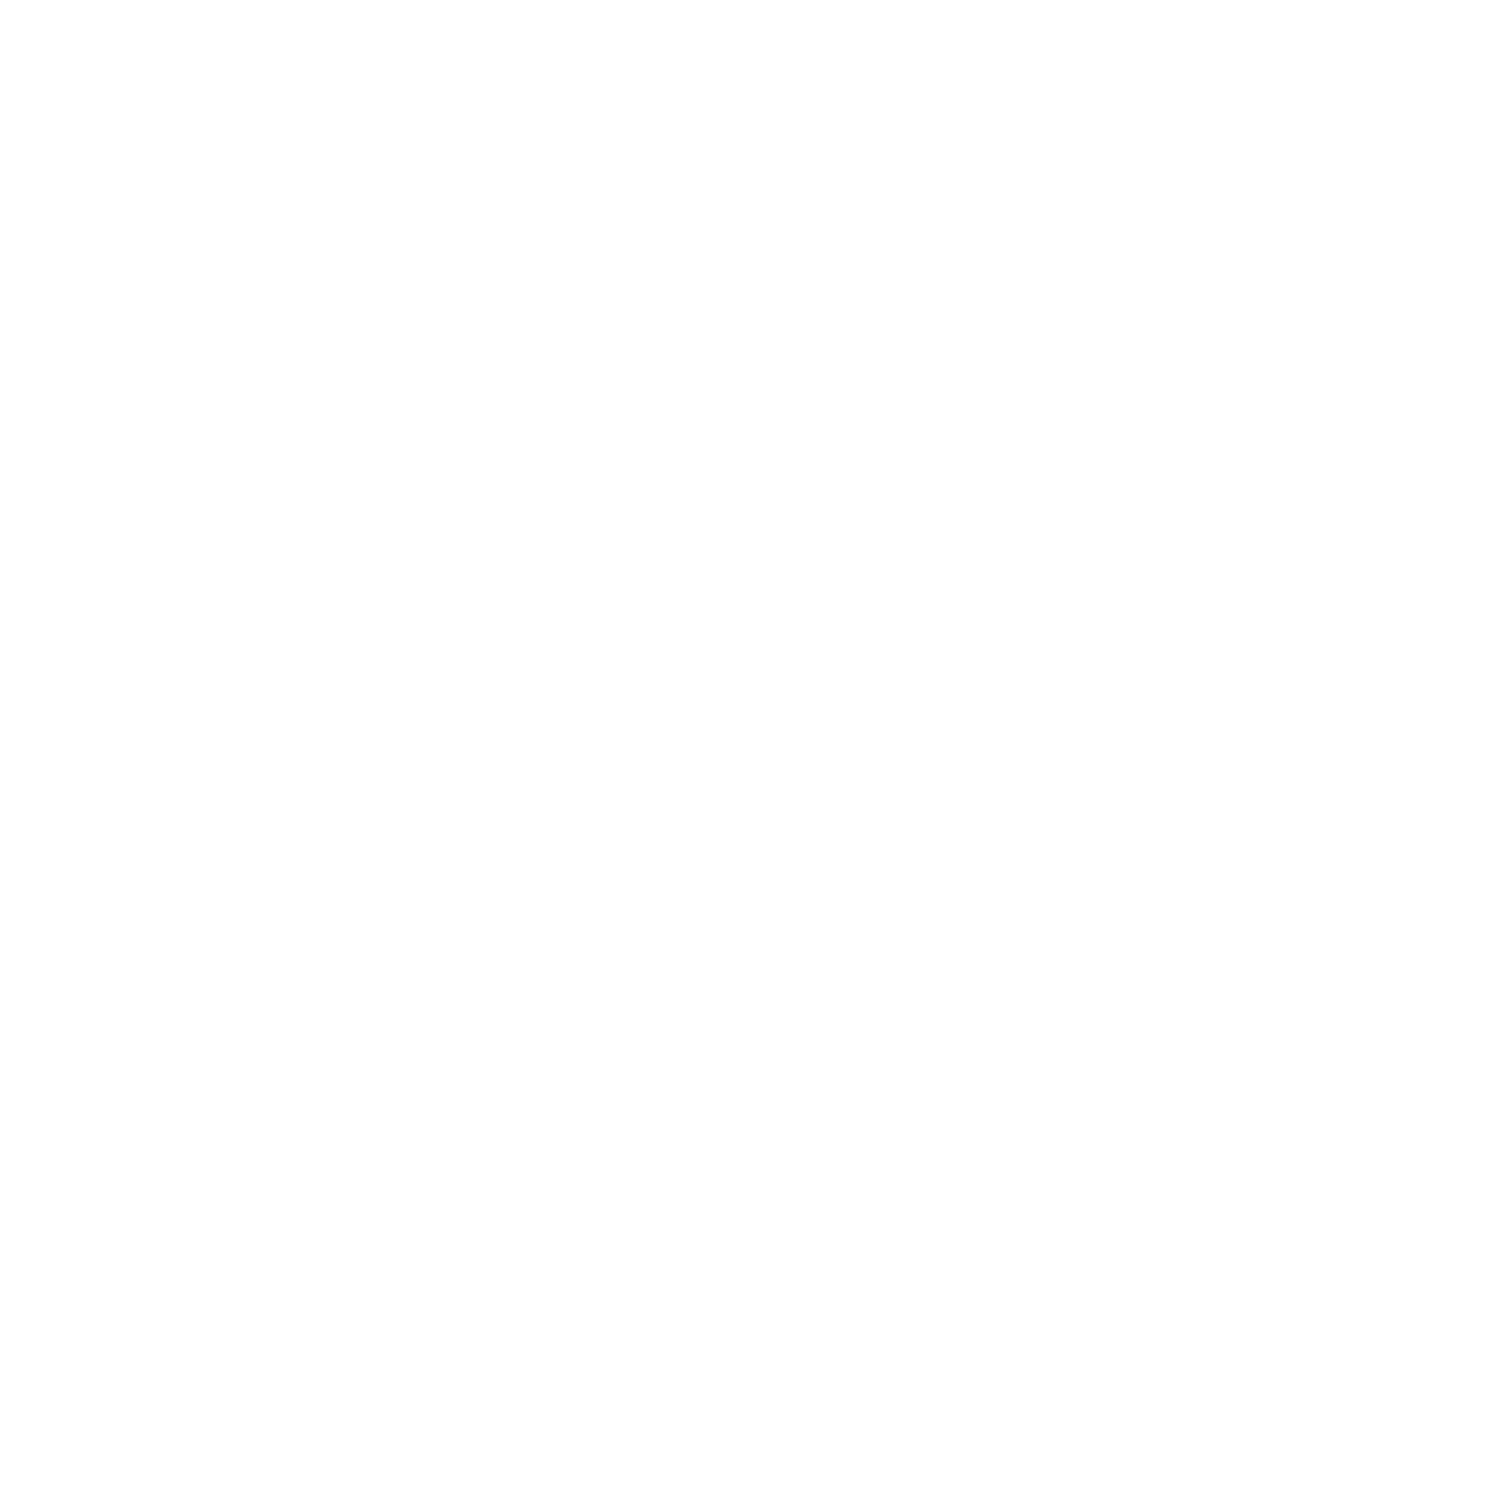

<IPython.core.display.Javascript object>


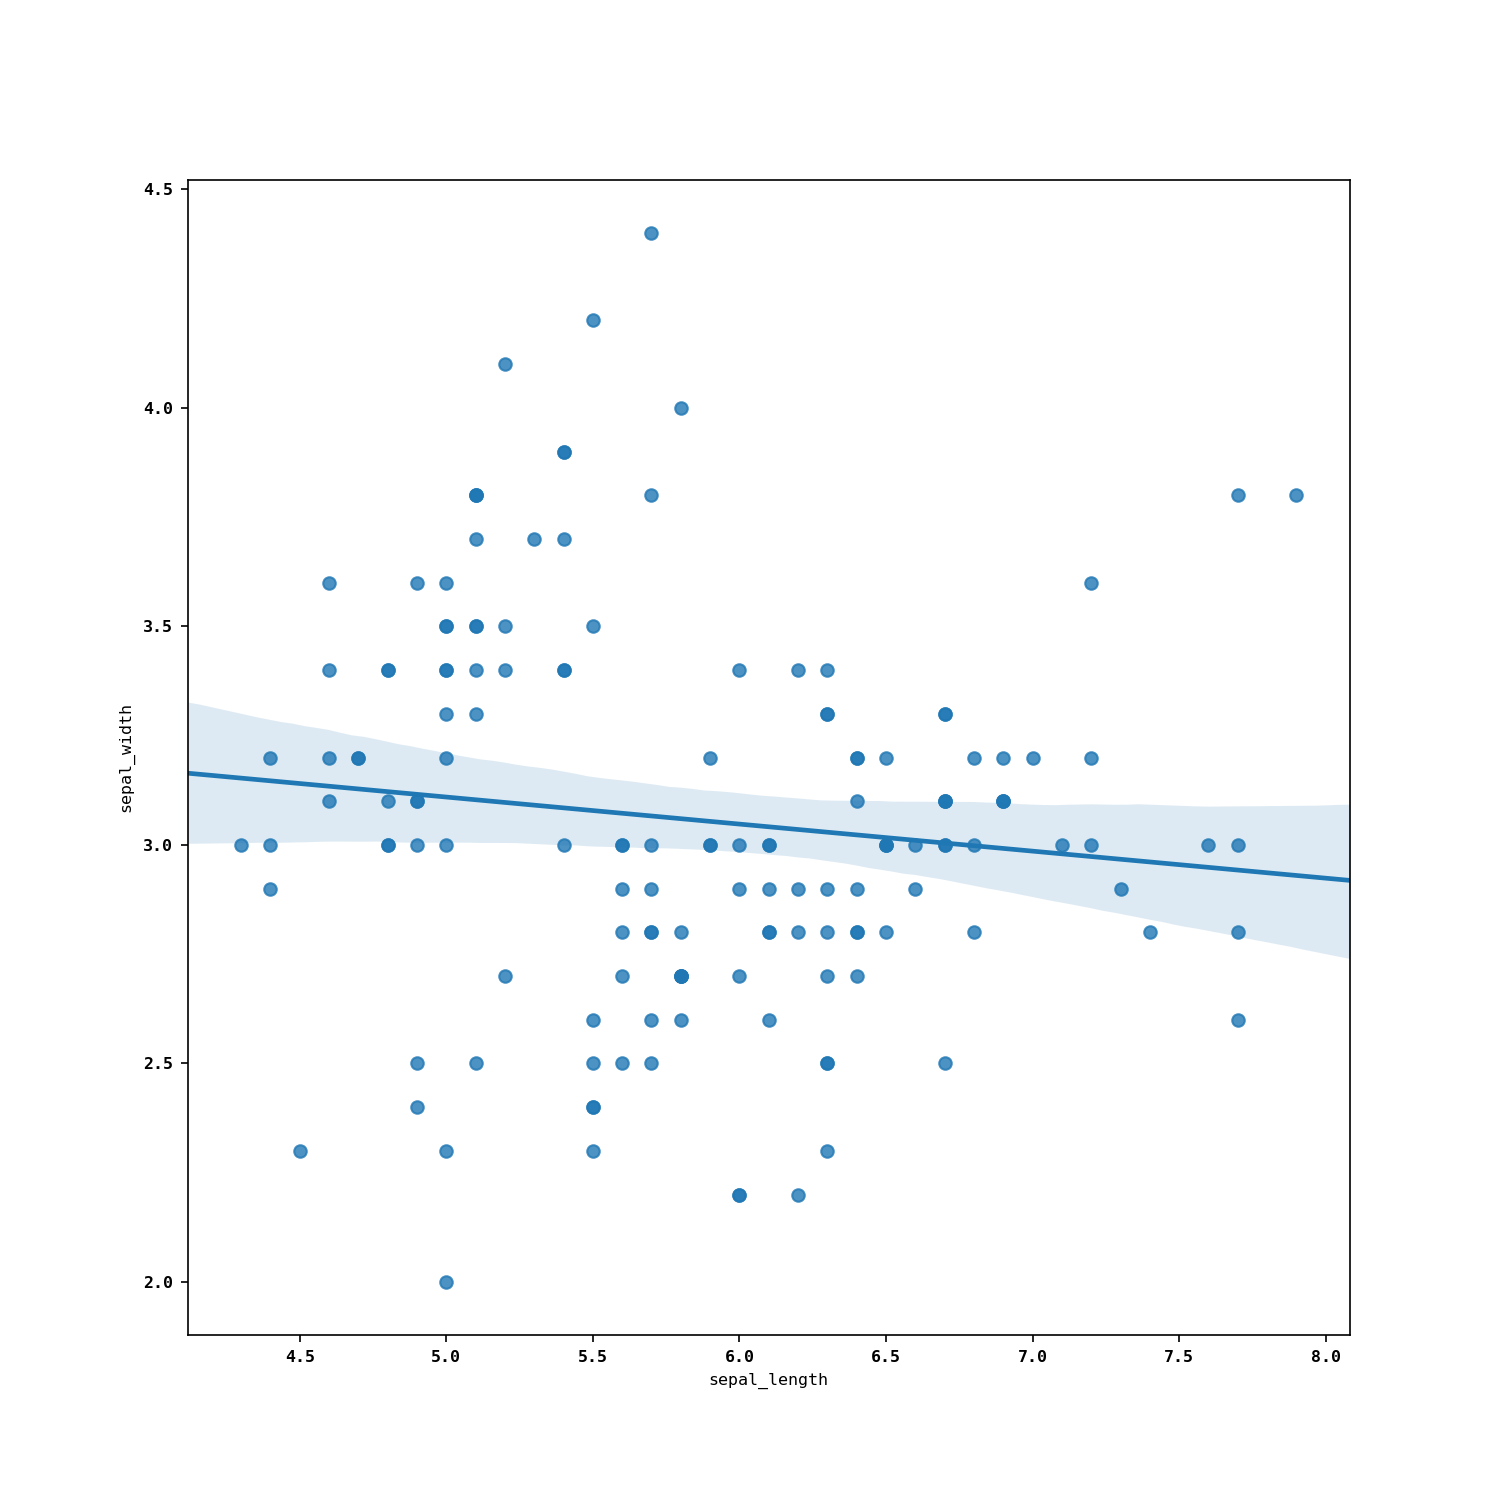

In [294]:
# use regplot, makes scatter plus linear reg line
plt.clf()
plt.close("all")
sns.regplot('sepal_length', 'sepal_width', data = iris)

<IPython.core.display.Javascript object>


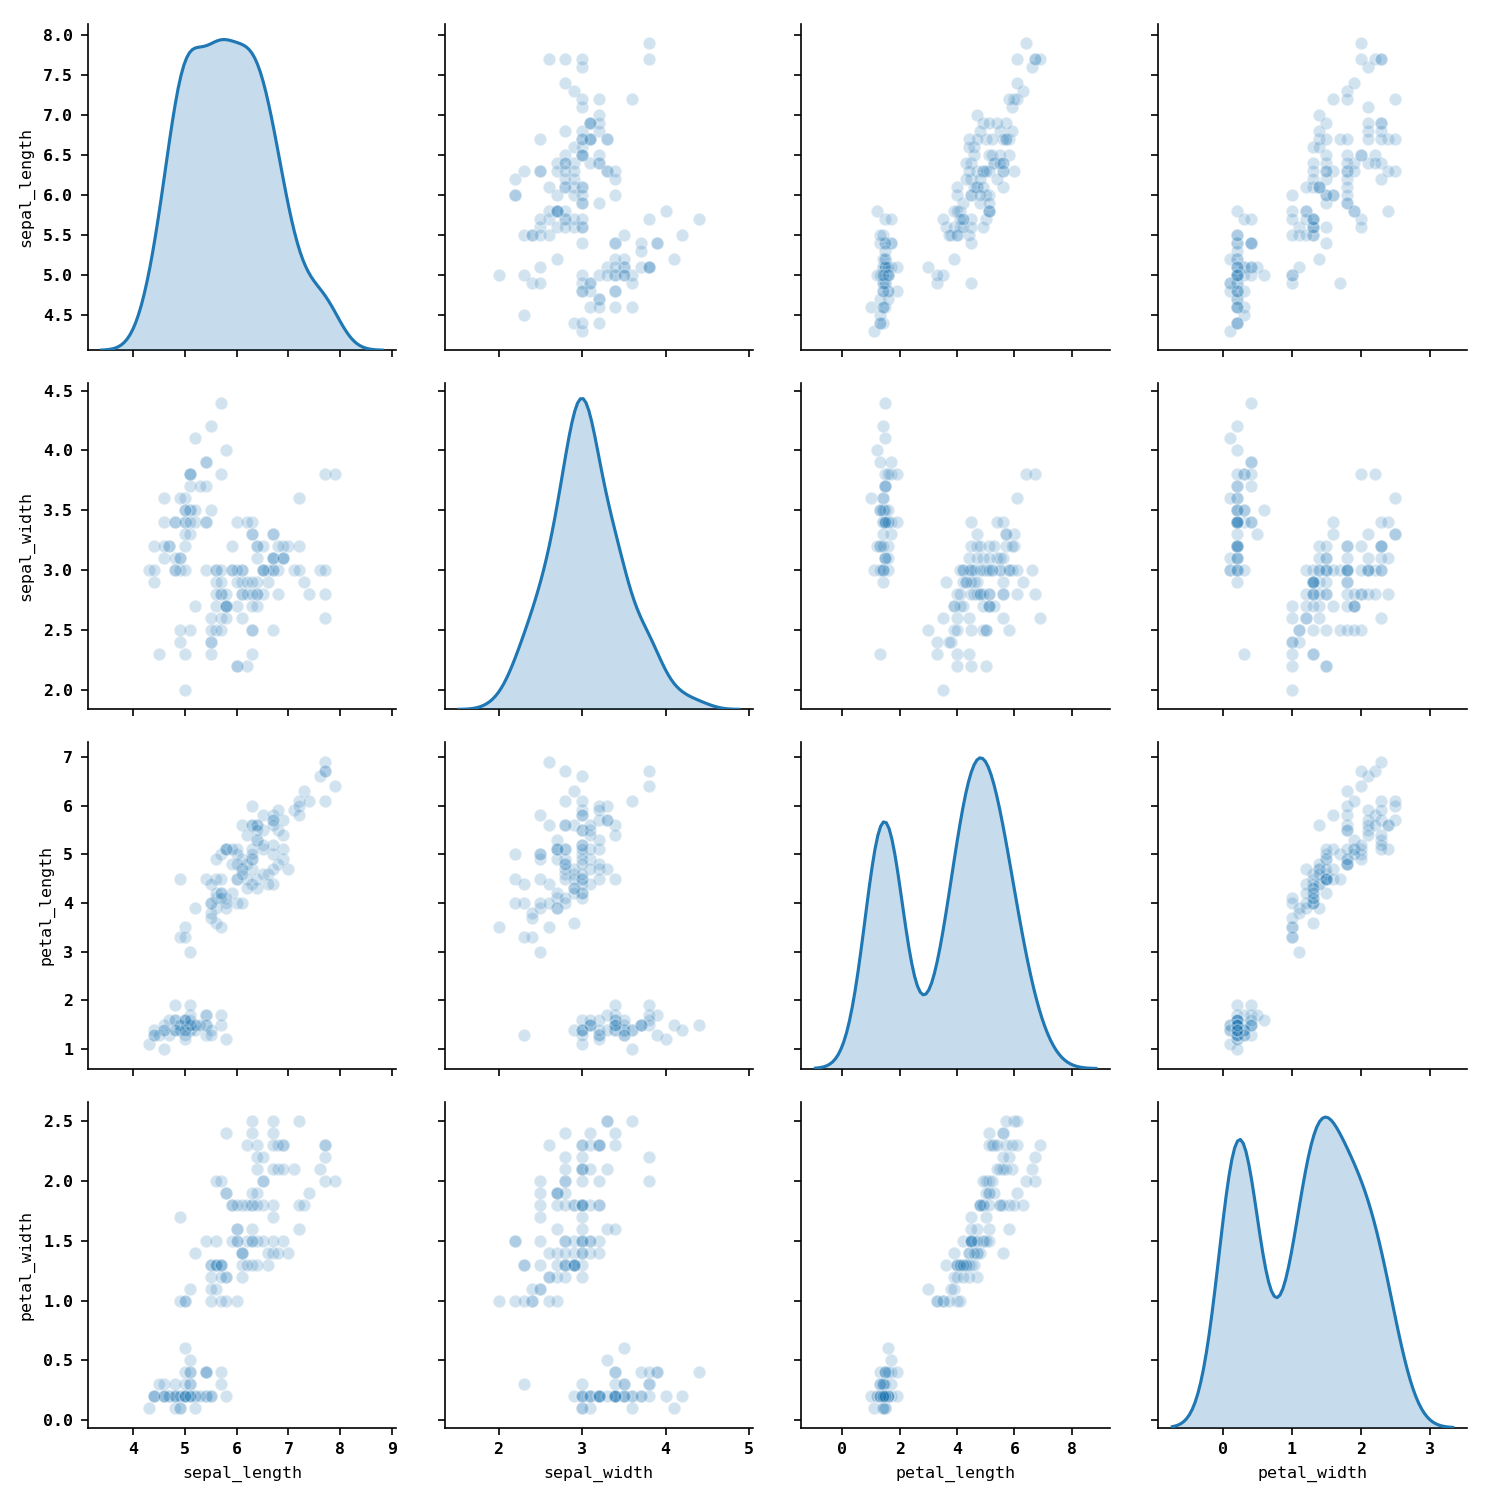

In [295]:
# pairplot
sns.pairplot(iris, diag_kind='kde', plot_kws={"alpha": 0.2})

<IPython.core.display.Javascript object>


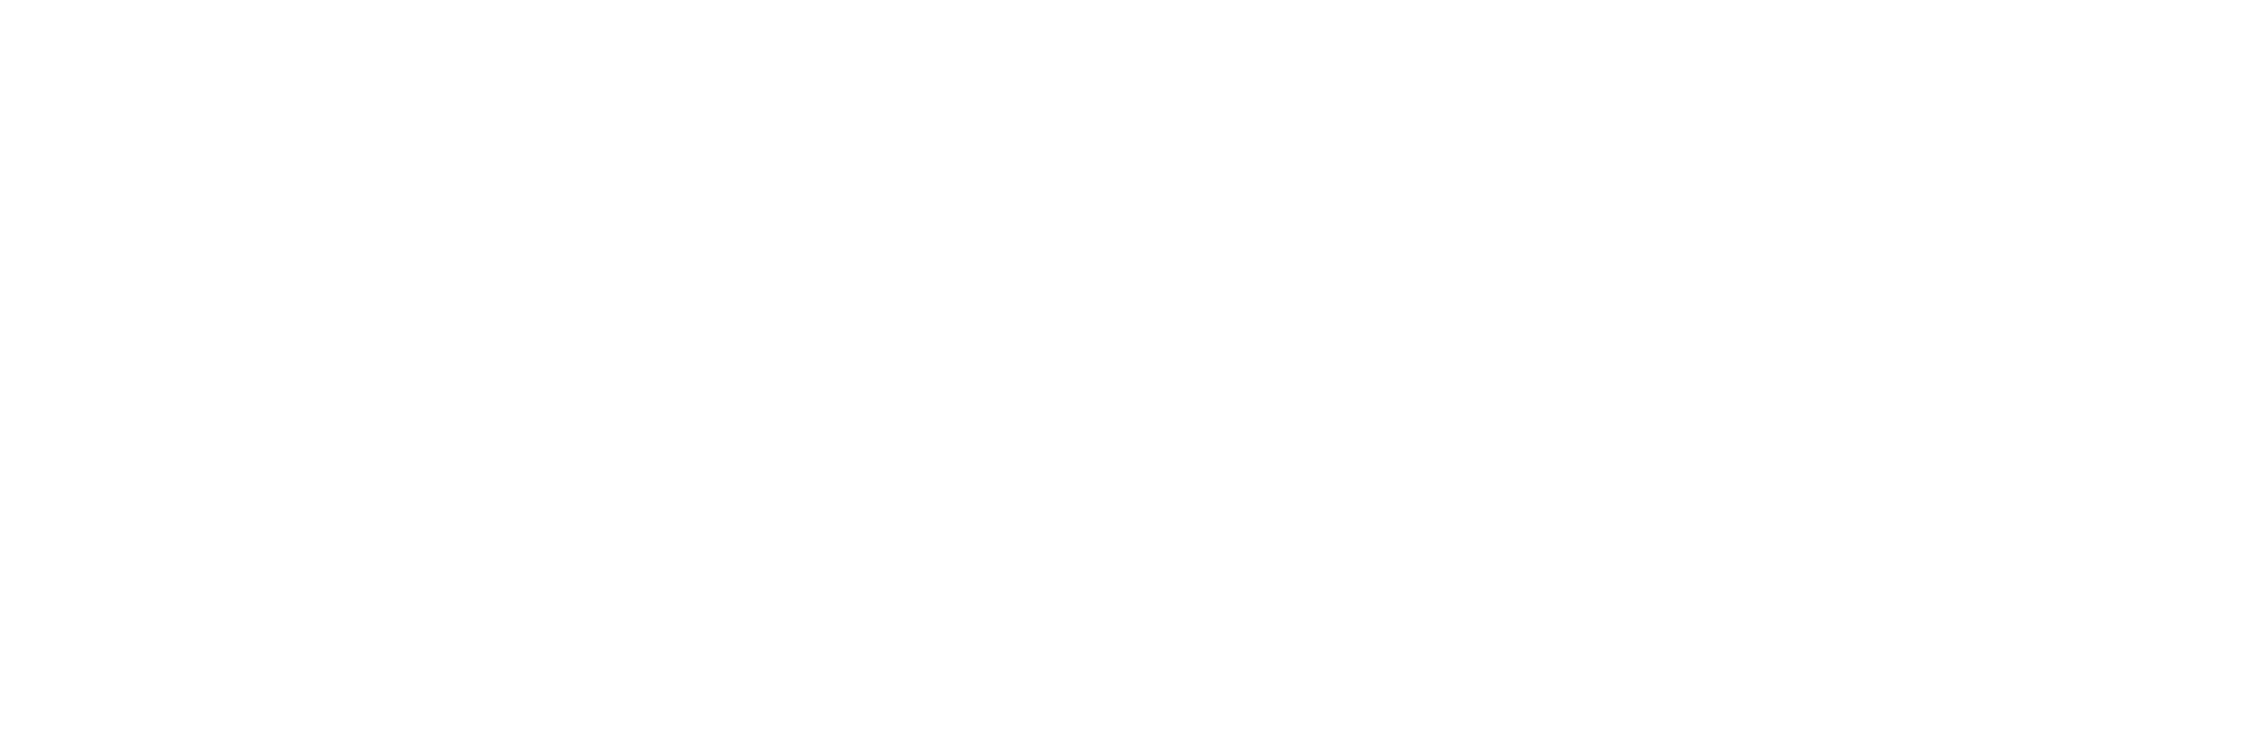

AttributeError: module 'matplotlib.pyplot' has no attribute 'cls'

In [313]:
# Facet grids
sns.factorplot(x='species', y='sepal_width',
              col='species', kind='bar', 
               data=iris[iris.sepal_length>3])
plt.close("all")
plt.cls()
